# Exploratory data analysis

In [1]:
###### invite people for the Kaggle party
import numpy as np
import pandas as pd
import kaggle
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("./Data/clean.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
ddf = pd.read_csv("./Data/clean_dummy.csv")
sf = pd.read_csv("./Data/clean_scaled.csv")
sf.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    3          60       RL         68.0    11250   Pave   NaN      IR1   
2   23          20       RL         75.0     9742   Pave   NaN      Reg   
3   33          20       RL         85.0    11049   Pave   NaN      Reg   
4   44          20       RL          NaN     9200   Pave   NaN      IR1   
5   60          20       RL         60.0     7200   Pave   NaN      Reg   
6  139          60       RL         73.0     9066   Pave   NaN      IR1   
7  195          20       RL         60.0     7180   Pave   NaN      IR1   
8  204         120       RM          NaN     4438   Pave   NaN      Reg   
9  217          20       RL         65.0     8450   Pave   NaN      Reg   

  LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN    NaN         NaN       0      2   2008   
1         Lvl    AllPub  ...    NaN    NaN         NaN       0      9   2008   
2         Lvl    AllPub  ...    NaN    NaN         NaN       0      9   2008   
3         Lvl    AllPub  ...    NaN    NaN         NaN       0      1   2008   
4         Lvl    AllPub  ...    NaN  MnPrv         NaN       0      7   2008   
5         Bnk    AllPub  ...    NaN  MnPrv         NaN       0      1   2008   
6         Lvl    AllPub  ...    NaN  GdPrv         NaN       0     12   2008   
7         Lvl    AllPub  ...    NaN    NaN         NaN       0      5   2008   
8         Lvl    AllPub  ...    NaN    NaN         NaN       0      1   2008   
9         Lvl    AllPub  ...    NaN    NaN         NaN       0      4   2008   

  SaleType  SaleCondition  SalePrice  NeighborhoodPrice  
0       WD         Normal     208500      187718.055556  
1       WD         Normal     223500      187718.055556  
2       WD         Normal     230000      187718.055556  
3       WD         Normal     179900      187718.055556  
4       WD         Normal     130250      187718.055556  
5       WD         Normal     124900      187718.055556  
6       WD         Normal     230000      187718.055556  
7       WD         Normal     127000      187718.055556  
8       WD         Normal     149000      187718.055556  
9       WD         Normal     210000      187718.055556  

[10 rows x 82 columns]

In [4]:
df.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1452.000000  1452.000000     1452  1195.000000    1452.000000   1452   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1144          NaN            NaN   1446   
mean     728.617769    56.859504      NaN    70.075314   10519.508264    NaN   
std      421.427935    42.283864      NaN    24.302691   10003.794562    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      363.750000    20.000000      NaN    59.000000    7538.750000    NaN   
50%      728.500000    50.000000      NaN    69.000000    9468.500000    NaN   
75%     1092.250000    70.000000      NaN    80.000000   11608.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities  ... PoolQC  Fence MiscFeature  \
count     91     1452        1452      1452  ...      7    281          53   
unique     2        4           4         2  ...      3      4           4   
top     Grvl      Reg         Lvl    AllPub  ...     Gd  MnPrv        Shed   
freq      50      919        1304      1451  ...      3    157          49   
mean     NaN      NaN         NaN       NaN  ...    NaN    NaN         NaN   
std      NaN      NaN         NaN       NaN  ...    NaN    NaN         NaN   
min      NaN      NaN         NaN       NaN  ...    NaN    NaN         NaN   
25%      NaN      NaN         NaN       NaN  ...    NaN    NaN         NaN   
50%      NaN      NaN         NaN       NaN  ...    NaN    NaN         NaN   
75%      NaN      NaN         NaN       NaN  ...    NaN    NaN         NaN   
max      NaN      NaN         NaN       NaN  ...    NaN    NaN         NaN   

             MiscVal       MoSold       YrSold SaleType  SaleCondition  \
count    1452.000000  1452.000000  1452.000000     1452           1452   
unique           NaN          NaN          NaN        9              6   
top              NaN          NaN          NaN       WD         Normal   
freq             NaN          NaN          NaN     1262           1192   
mean       38.012397     6.317493  2007.817493      NaN            NaN   
std       447.743912     2.705463     1.329472      NaN            NaN   
min         0.000000     1.000000  2006.000000      NaN            NaN   
25%         0.000000     5.000000  2007.000000      NaN            NaN   
50%         0.000000     6.000000  2008.000000      NaN            NaN   
75%         0.000000     8.000000  2009.000000      NaN            NaN   
max     15500.000000    12.000000  2010.000000      NaN            NaN   

            SalePrice  NeighborhoodPrice  
count     1452.000000        1452.000000  
unique            NaN                NaN  
top               NaN                NaN  
freq              NaN                NaN  
mean    180797.154270      180797.154270  
std      79405.084122       60470.806555  
min      34900.000000       81333.333333  
25%     129975.000000      135963.807692  
50%     162950.000000      167860.461538  
75%     214000.000000      203700.000000  
max     755000.000000      399730.909091  

[11 rows x 82 columns]

In [5]:
df.info()
# too many of these are float64 when they should be intergers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 82 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1452 non-null   int64  
 1   MSSubClass         1452 non-null   int64  
 2   MSZoning           1452 non-null   object 
 3   LotFrontage        1195 non-null   float64
 4   LotArea            1452 non-null   int64  
 5   Street             1452 non-null   object 
 6   Alley              91 non-null     object 
 7   LotShape           1452 non-null   object 
 8   LandContour        1452 non-null   object 
 9   Utilities          1452 non-null   object 
 10  LotConfig          1452 non-null   object 
 11  LandSlope          1452 non-null   object 
 12  Neighborhood       1452 non-null   object 
 13  Condition1         1452 non-null   object 
 14  Condition2         1452 non-null   object 
 15  BldgType           1452 non-null   object 
 16  HouseStyle         1452 

In [6]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Columns: 267 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(267)
memory usage: 3.0 MB


In [7]:
# These should all be intergers so I need to change them.
df = df.convert_dtypes()
ddf= df.convert_dtypes()
sf = sf.convert_dtypes()
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL           65     8450   Pave  <NA>      Reg   
1        3          60       RL           68    11250   Pave  <NA>      IR1   
2       23          20       RL           75     9742   Pave  <NA>      Reg   
3       33          20       RL           85    11049   Pave  <NA>      Reg   
4       44          20       RL         <NA>     9200   Pave  <NA>      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1447  1069         160       RM           42     3964   Pave  <NA>      Reg   
1448  1368         160       RM           41     2665   Pave  <NA>      Reg   
1449  1450         180       RM           21     1533   Pave  <NA>      Reg   
1450  1161         160       RL           24     2280   Pave  <NA>      Reg   
1451  1422         120       RL           53     4043   Pave  <NA>      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
0            Lvl    AllPub  ...   <NA>   <NA>        <NA>       0      2   
1            Lvl    AllPub  ...   <NA>   <NA>        <NA>       0      9   
2            Lvl    AllPub  ...   <NA>   <NA>        <NA>       0      9   
3            Lvl    AllPub  ...   <NA>   <NA>        <NA>       0      1   
4            Lvl    AllPub  ...   <NA>  MnPrv        <NA>       0      7   
...          ...       ...  ...    ...    ...         ...     ...    ...   
1447         Lvl    AllPub  ...   <NA>  GdPrv        <NA>       0      6   
1448         Lvl    AllPub  ...   <NA>   <NA>        <NA>       0      7   
1449         Lvl    AllPub  ...   <NA>   <NA>        <NA>       0      8   
1450         Lvl    AllPub  ...   <NA>   <NA>        <NA>       0      7   
1451         Lvl    AllPub  ...   <NA>   <NA>        <NA>       0      7   

     YrSold SaleType  SaleCondition  SalePrice  NeighborhoodPrice  
0      2008       WD         Normal     208500      187718.055556  
1      2008       WD         Normal     223500      187718.055556  
2      2008       WD         Normal     230000      187718.055556  
3      2008       WD         Normal     179900      187718.055556  
4      2008       WD         Normal     130250      187718.055556  
...     ...      ...            ...        ...                ...  
1447   2006       WD         Normal     151400      123466.666667  
1448   2006       WD         Normal     127000      123466.666667  
1449   2006       WD        Abnorml      92000      123466.666667  
1450   2010       WD         Normal     146000           136750.0  
1451   2010       WD         Normal     127500           136750.0  

[1452 rows x 82 columns]

In [8]:
pd.set_option('display.max_rows', None)
df.isna().sum()

Id                      0
MSSubClass              0
MSZoning                0
LotFrontage           257
LotArea                 0
Street                  0
Alley                1361
LotShape                0
LandContour             0
Utilities               0
LotConfig               0
LandSlope               0
Neighborhood            0
Condition1              0
Condition2              0
BldgType                0
HouseStyle              0
OverallQual             0
OverallCond             0
YearBuilt               0
YearRemodAdd            0
RoofStyle               0
RoofMatl                0
Exterior1st             0
Exterior2nd             0
MasVnrType              0
MasVnrArea              0
ExterQual               0
ExterCond               0
Foundation              0
BsmtQual               37
BsmtCond               37
BsmtExposure           38
BsmtFinType1           37
BsmtFinSF1              0
BsmtFinType2           38
BsmtFinSF2              0
BsmtUnfSF               0
TotalBsmtSF 

In [9]:
# Why are there 8 nan in everything? 
df['SalePrice'].isna().sum()

0

In [10]:
sf['SalePrice'].isna().sum()

9

In [11]:
ddf['SalePrice'].isna().sum()

0

In [12]:
# It's all nan values accross the board.  I'll get rid of them
#df.dropna(subset=['SalePrice'],inplace=True)
#ddf.dropna(subset=['SalePrice'], inplace=True)
sf.dropna(subset=['SalePrice'],inplace=True)

In [13]:
print('sf',sf['SalePrice'].isna().sum(),'\nddf ',ddf['SalePrice'].isna().sum(),'\ndf ',df['SalePrice'].isna().sum())

sf 0 
ddf  0 
df  0


In [14]:
# a quick thing to only display the missing entries
def Missing (train):
    Missing={n:train[n].isna() for n in train.keys()}
    Missing_data=pd.DataFrame(Missing).sum()
    results=Missing_data[Missing_data>0]
    return results

In [15]:
Missing(df)

LotFrontage      257
Alley           1361
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      686
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1445
Fence           1171
MiscFeature     1399
dtype: int64

In [16]:
Missing(ddf)

LotFrontage      257
Alley           1361
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      686
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1445
Fence           1171
MiscFeature     1399
dtype: int64

In [17]:
Missing(sf)

LotFrontage     256
Alley          1352
BsmtQual         37
FireplaceQu     680
GarageYrBlt      81
GarageQual       81
GarageCond       81
PoolQC         1436
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 82 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1452 non-null   Int64  
 1   MSSubClass         1452 non-null   Int64  
 2   MSZoning           1452 non-null   string 
 3   LotFrontage        1195 non-null   Int64  
 4   LotArea            1452 non-null   Int64  
 5   Street             1452 non-null   string 
 6   Alley              91 non-null     string 
 7   LotShape           1452 non-null   string 
 8   LandContour        1452 non-null   string 
 9   Utilities          1452 non-null   string 
 10  LotConfig          1452 non-null   string 
 11  LandSlope          1452 non-null   string 
 12  Neighborhood       1452 non-null   string 
 13  Condition1         1452 non-null   string 
 14  Condition2         1452 non-null   string 
 15  BldgType           1452 non-null   string 
 16  HouseStyle         1452 

In [19]:
x=df['LotFrontage'].fillna(df['LotFrontage'].median())
print("A peak at the LotFrontage data\n",df['LotFrontage'].describe())
print("If we fill NaN of the LotFrontage with median\n",x.describe())

A peak at the LotFrontage data
 count    1195.000000
mean       70.075314
std        24.302691
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
If we fill NaN of the LotFrontage with median
 count    1452.000000
mean       69.884986
std        22.049468
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64


In [20]:
# Put a pin in that until later

In [21]:
df[['YearBuilt','GarageYrBlt','GarageType','GarageFinish','GarageCars']][df['GarageCars']==0]

YearBuilt  GarageYrBlt GarageType GarageFinish  GarageCars
70         1985         <NA>       <NA>         <NA>           0
121        1920         <NA>       <NA>         <NA>           0
125        1900         <NA>       <NA>         <NA>           0
130        1914         <NA>       <NA>         <NA>           0
138        1872         <NA>       <NA>         <NA>           0
149        1935         <NA>       <NA>         <NA>           0
150        1924         <NA>       <NA>         <NA>           0
164        1959         <NA>       <NA>         <NA>           0
186        1994         <NA>       <NA>         <NA>           0
266        1946         <NA>       <NA>         <NA>           0
280        1959         <NA>       <NA>         <NA>           0
281        1971         <NA>       <NA>         <NA>           0
326        2004         <NA>       <NA>         <NA>           0
379        1974         <NA>       <NA>         <NA>           0
383        1919         <NA>       <NA>         <NA>           0
390        1914         <NA>       <NA>         <NA>           0
394        1970         <NA>       <NA>         <NA>           0
397        1968         <NA>       <NA>         <NA>           0
409        1875         <NA>       <NA>         <NA>           0
455        1971         <NA>       <NA>         <NA>           0
471        1949         <NA>       <NA>         <NA>           0
488        1920         <NA>       <NA>         <NA>           0
492        1922         <NA>       <NA>         <NA>           0
519        1978         <NA>       <NA>         <NA>           0
550        1955         <NA>       <NA>         <NA>           0
551        1924         <NA>       <NA>         <NA>           0
552        1940         <NA>       <NA>         <NA>           0
553        1925         <NA>       <NA>         <NA>           0
556        1955         <NA>       <NA>         <NA>           0
558        1910         <NA>       <NA>         <NA>           0
559        1940         <NA>       <NA>         <NA>           0
561        1914         <NA>       <NA>         <NA>           0
562        1910         <NA>       <NA>         <NA>           0
568        1900         <NA>       <NA>         <NA>           0
599        1920         <NA>       <NA>         <NA>           0
602        1912         <NA>       <NA>         <NA>           0
615        1910         <NA>       <NA>         <NA>           0
662        1941         <NA>       <NA>         <NA>           0
669        1923         <NA>       <NA>         <NA>           0
672        1947         <NA>       <NA>         <NA>           0
674        1930         <NA>       <NA>         <NA>           0
709        1961         <NA>       <NA>         <NA>           0
806        1910         <NA>       <NA>         <NA>           0
823        2007         <NA>       <NA>         <NA>           0
827        1991         <NA>       <NA>         <NA>           0
851        1970         <NA>       <NA>         <NA>           0
863        2006         <NA>       <NA>         <NA>           0
893        1915         <NA>       <NA>         <NA>           0
896        1920         <NA>       <NA>         <NA>           0
909        1930         <NA>       <NA>         <NA>           0
910        1956         <NA>       <NA>         <NA>           0
914        1945         <NA>       <NA>         <NA>           0
939        1920         <NA>       <NA>         <NA>           0
940        1990         <NA>       <NA>         <NA>           0
942        1977         <NA>       <NA>         <NA>           0
946        1931         <NA>       <NA>         <NA>           0
954        1965         <NA>       <NA>         <NA>           0
1010       1910         <NA>       <NA>         <NA>           0
1015       1975         <NA>       <NA>         <NA>           0
1019       1954         <NA>       <NA>         <NA>           0
1062       1935         <NA>       <NA>  

In [22]:
#This should be fine.  Label encoder will just turn thes np.nan values into their own category

(array([686.,   0.,   0., 646.,   0.,   0., 115.,   0.,   0.,   5.]),
 array([0.0, 0.3, 0.6, 0.8999999999999999, 1.2, 1.5, 1.7999999999999998,
        2.1, 2.4, 2.6999999999999997, 3.0], dtype=object),
 <BarContainer object of 10 artists>)

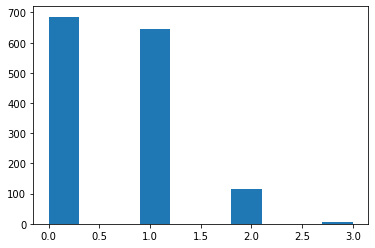

In [23]:
plt.hist(df['Fireplaces'])

In [24]:
# Some of the values like FireplaceQu has NaN values.  They all are assocaiated with number of fireplaces = 0.  
# Probably best to have the FireplaceQu =0 in this case as it's not missing data but data that is empty b/c it's =0
# Other data that should probably be filled with a 0 is FrontageLot and PoolQual
# Most of the others median may be the best thing to impute for the data

In [25]:
# I think this will turn out okay when Fireplace Quality becomes a separate category which is reflective of 0 fireplaces
#df[['Fireplaces','FireplaceQu']][df['FireplaceQu'].isna()]

In [26]:
pd.set_option('display.max_rows', 10)

In [27]:
plt.style.use('bmh')

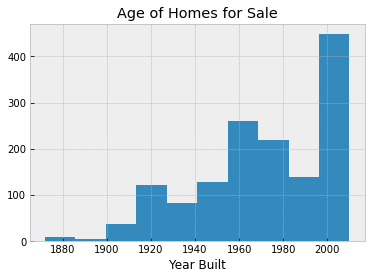

In [28]:
Hist_built=plt.hist(df['YearBuilt'])
Hist_built=plt.xlabel('Year Built')
Hist_built=plt.title('Age of Homes for Sale')
plt.show()

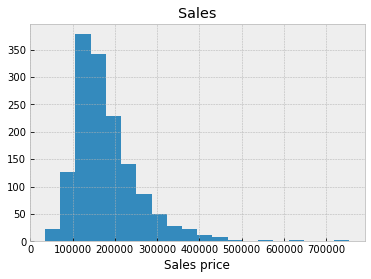

In [29]:
Hist_Sale=plt.hist(df['SalePrice'], bins=20)
Hist_Sale=plt.xlabel('Sales price')
Hist_Sale=plt.title('Sales')
plt.show()

I should divide this by 100K so it's easier to read.

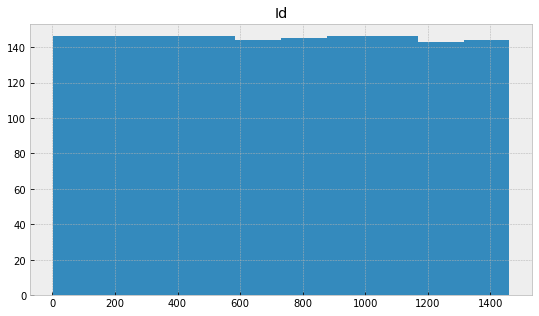

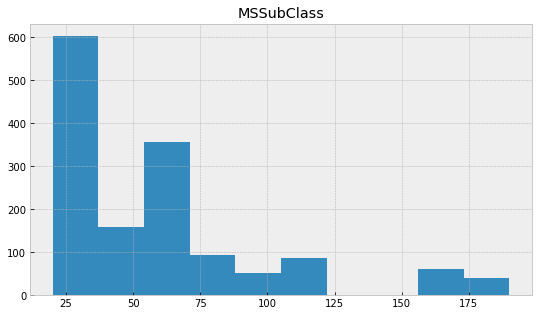

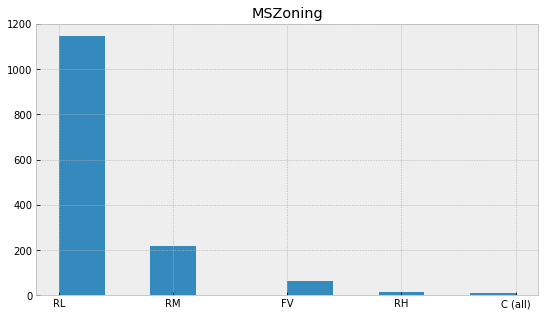

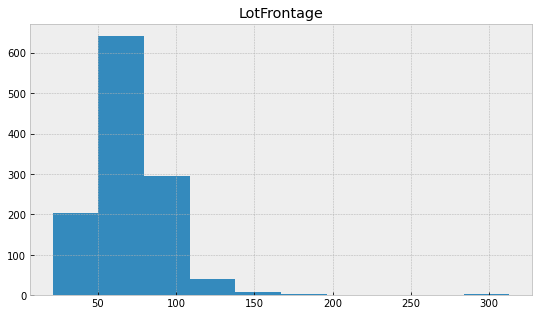

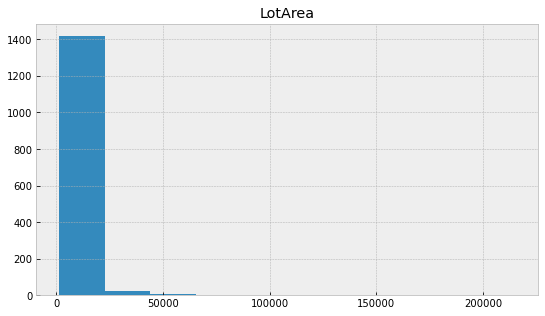

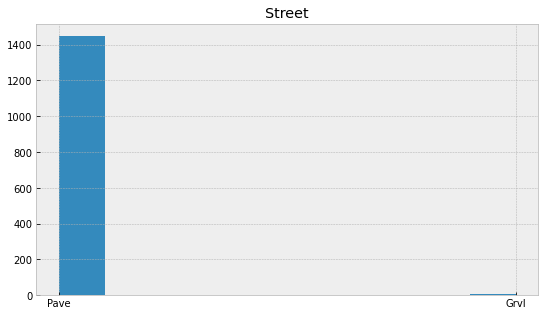

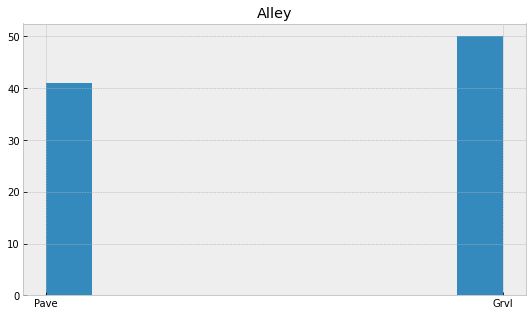

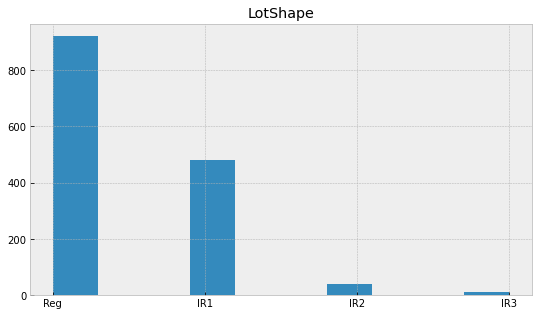

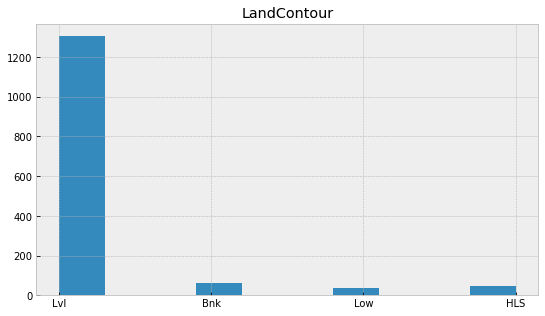

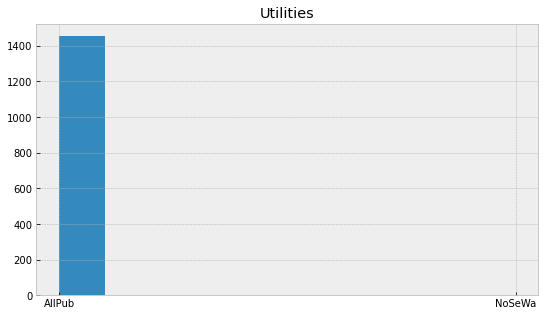

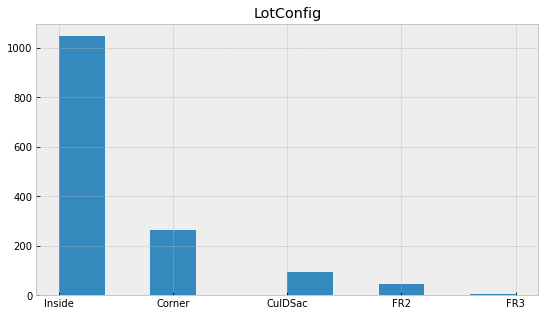

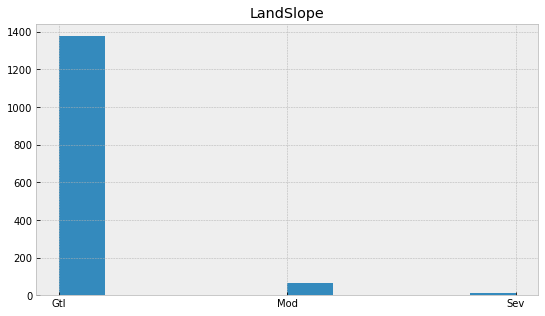

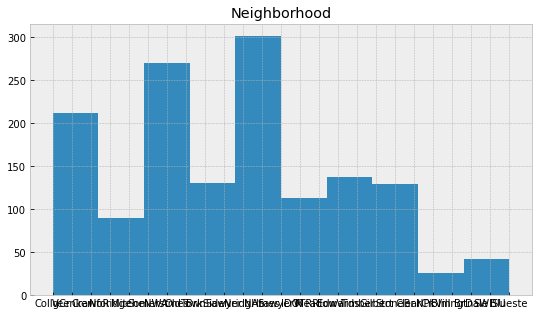

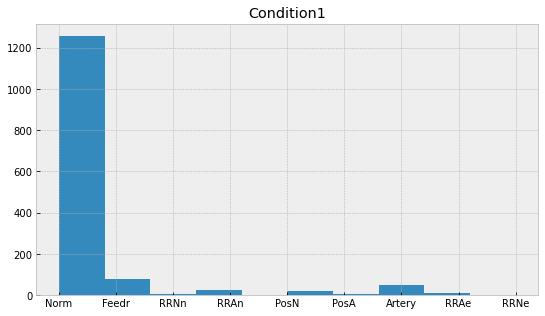

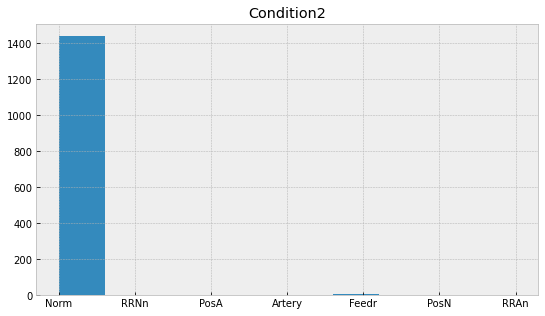

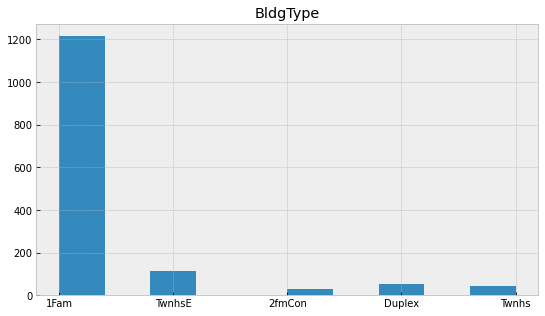

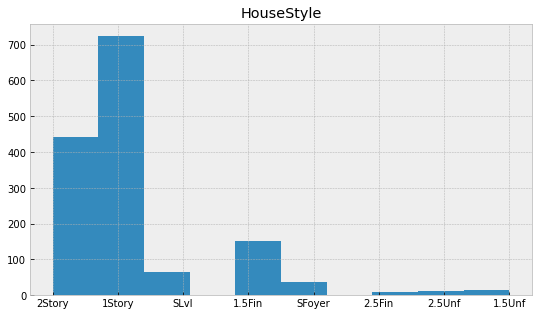

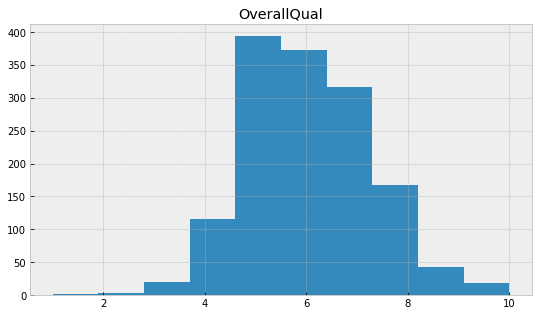

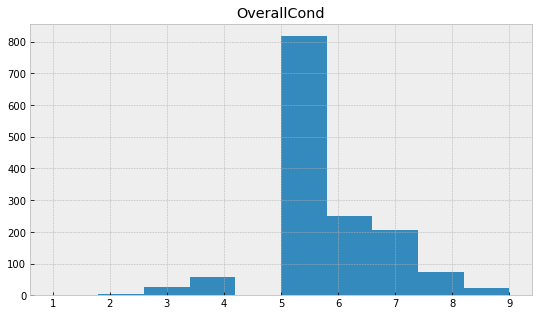

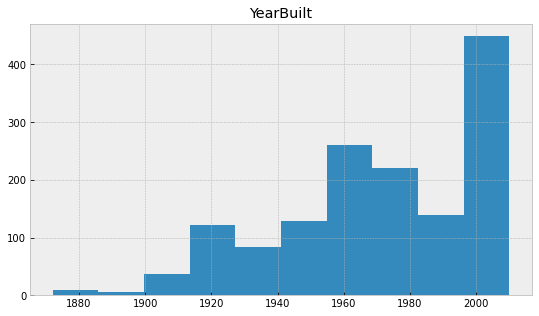

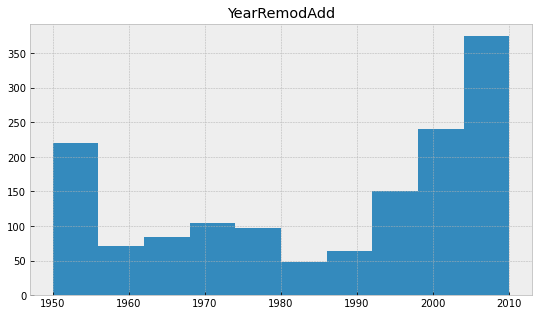

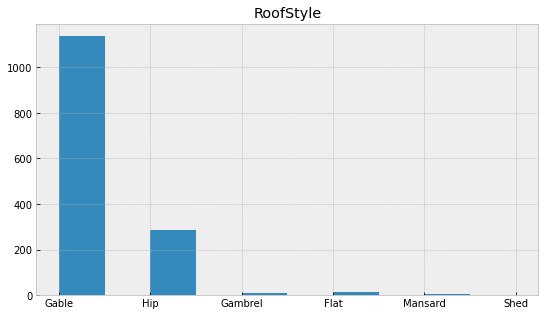

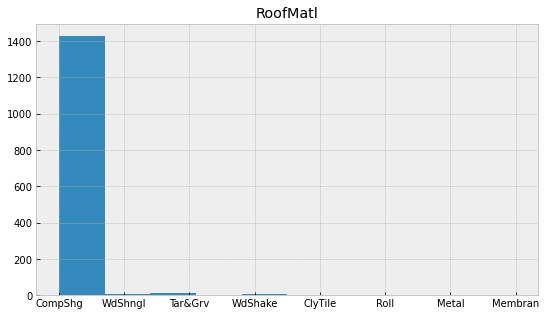

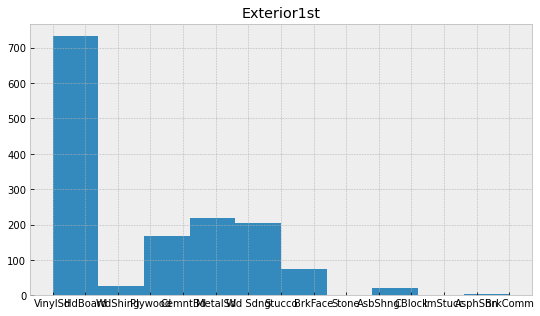

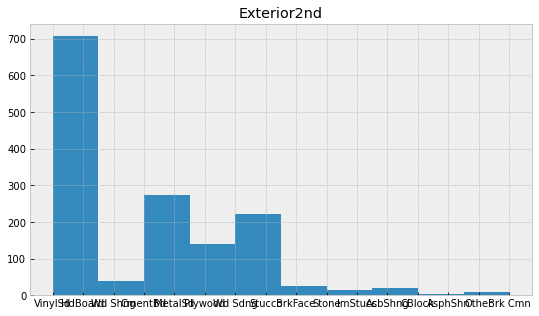

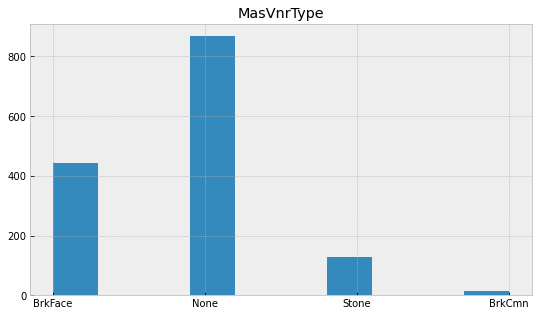

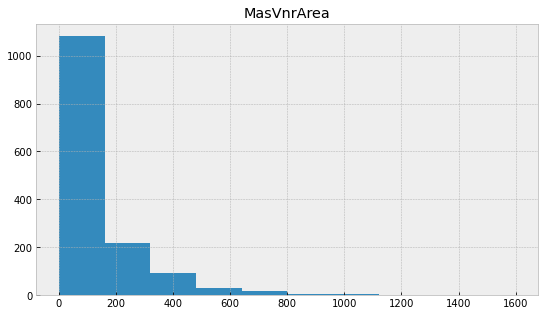

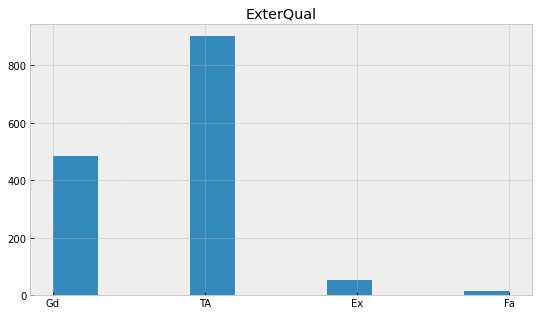

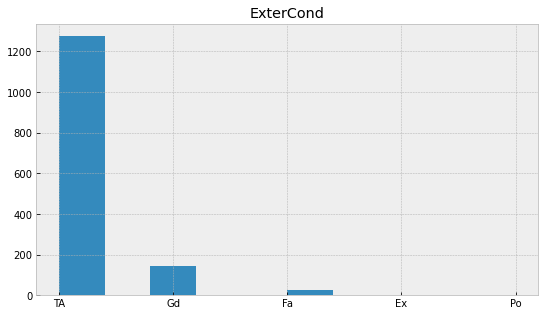

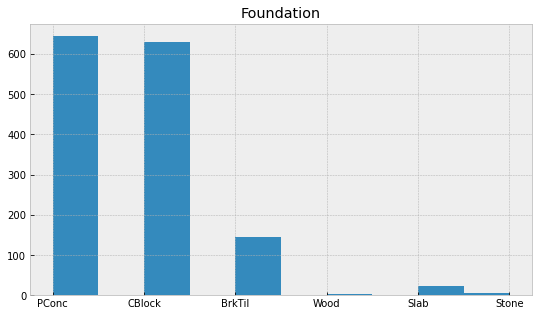

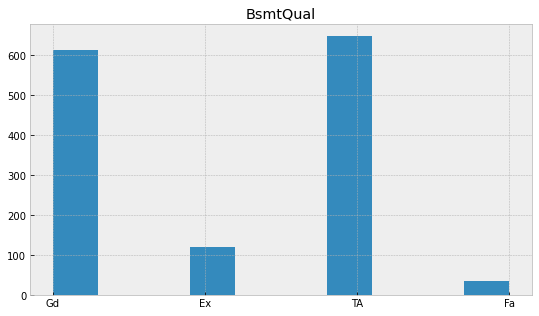

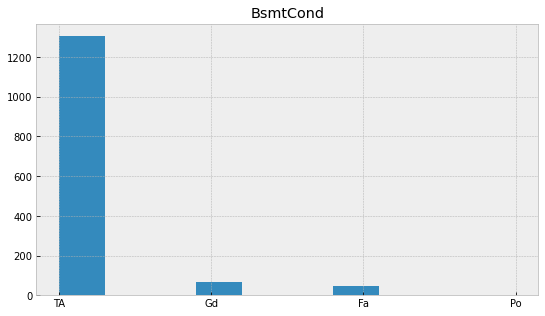

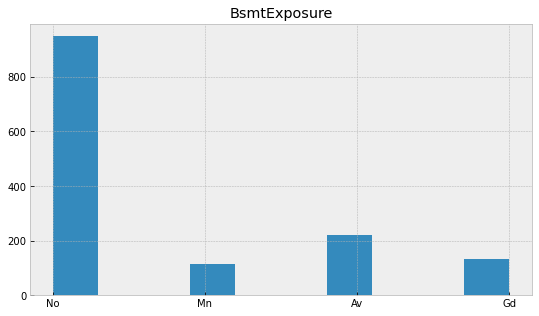

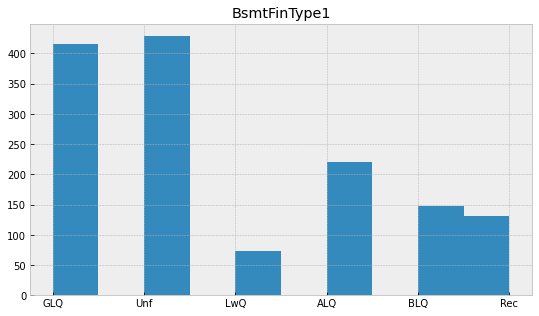

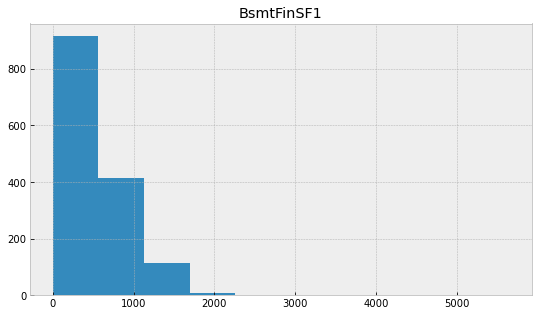

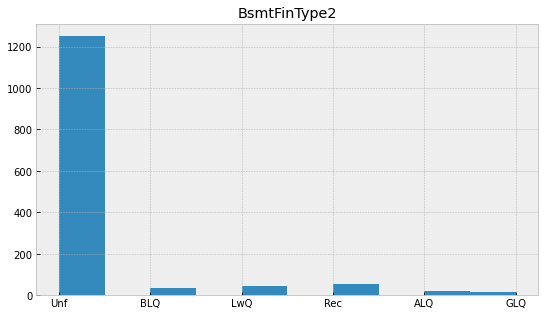

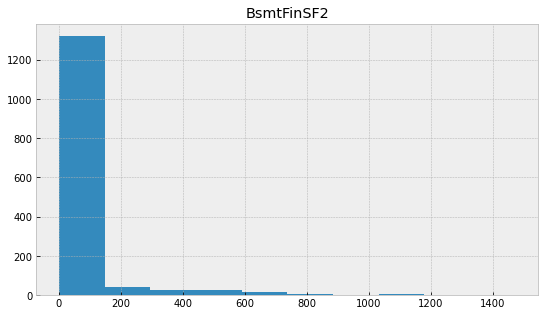

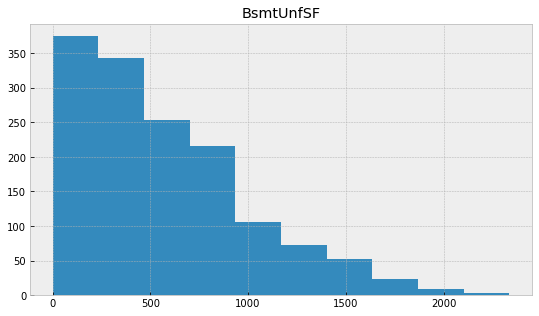

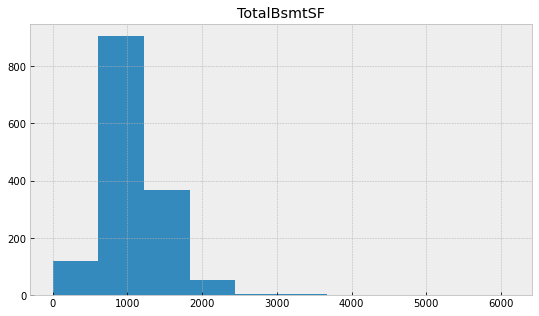

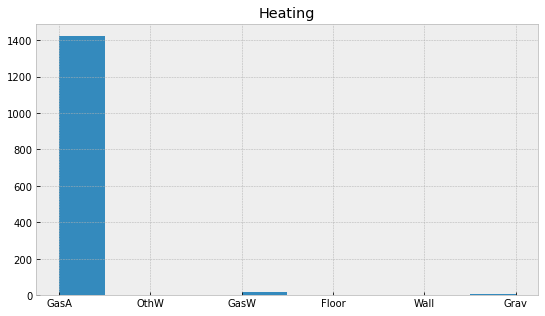

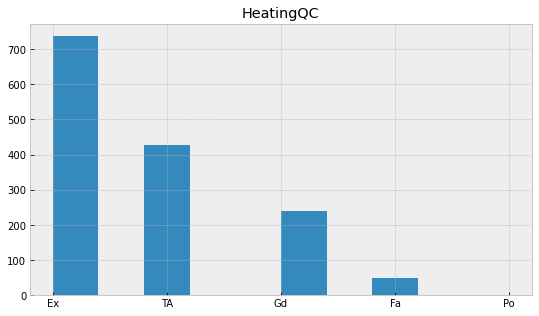

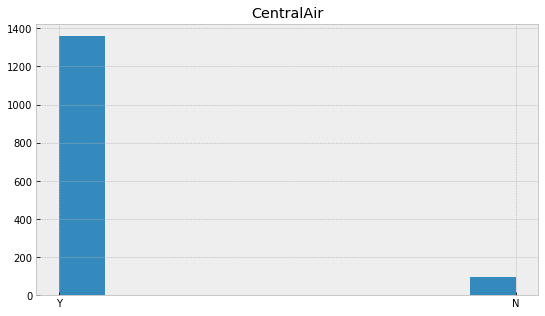

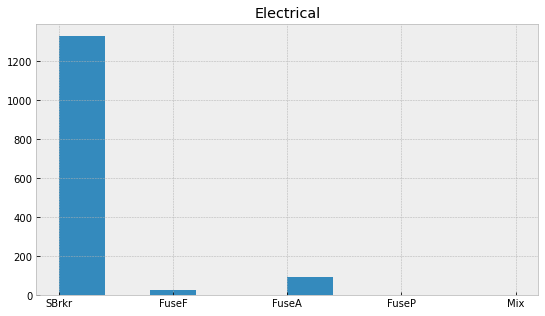

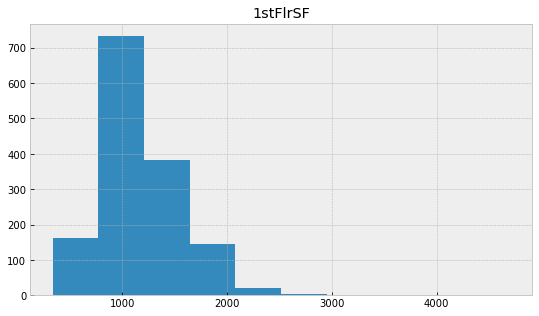

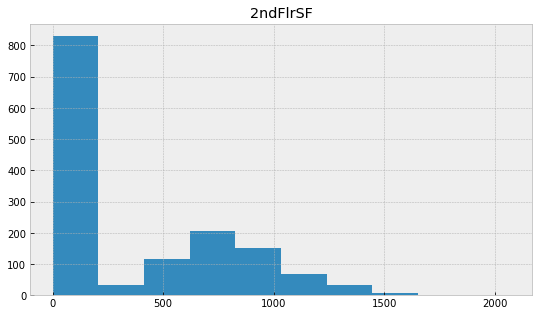

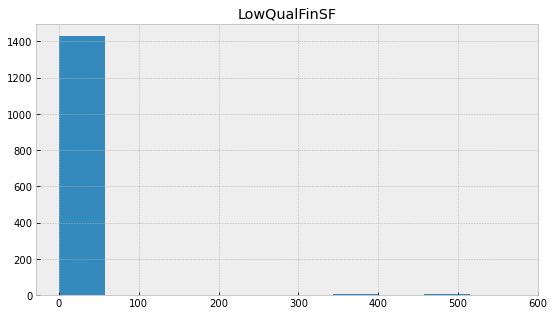

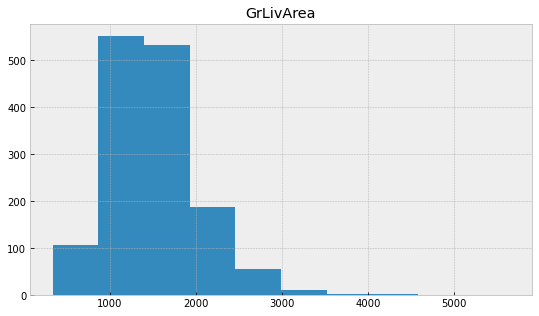

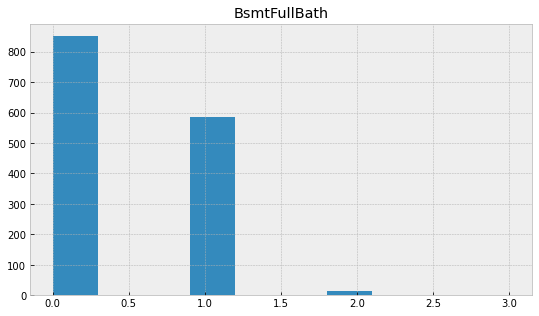

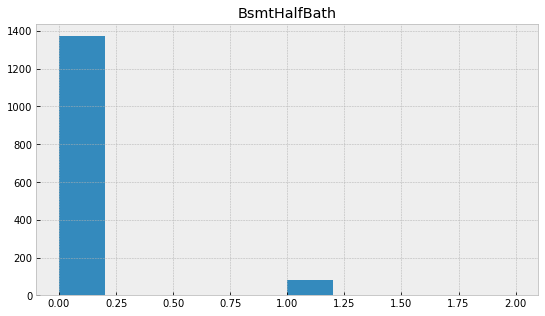

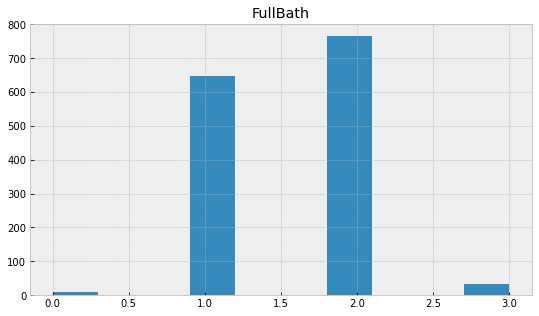

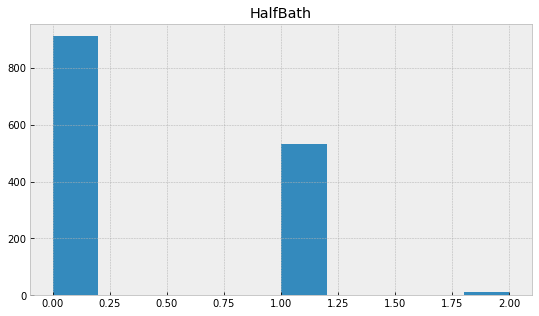

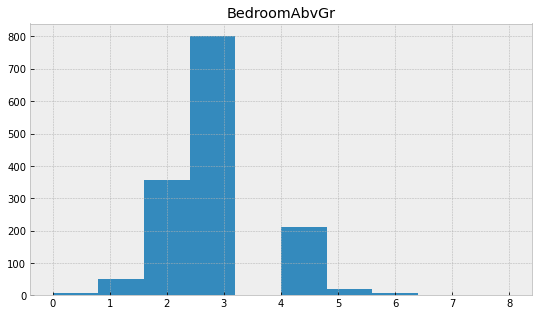

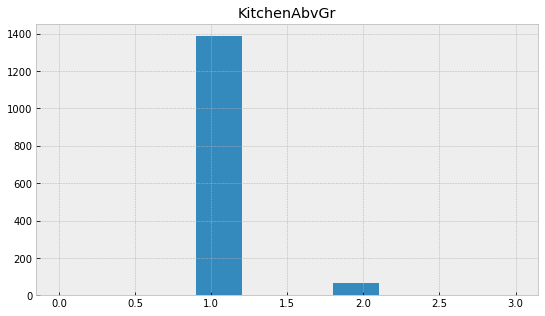

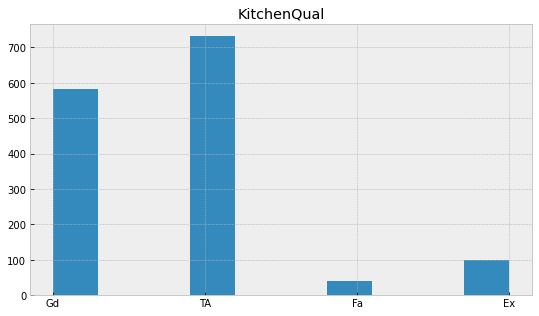

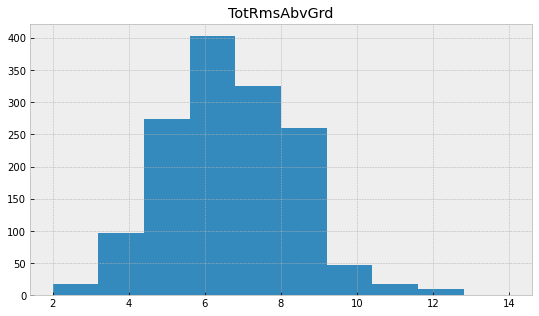

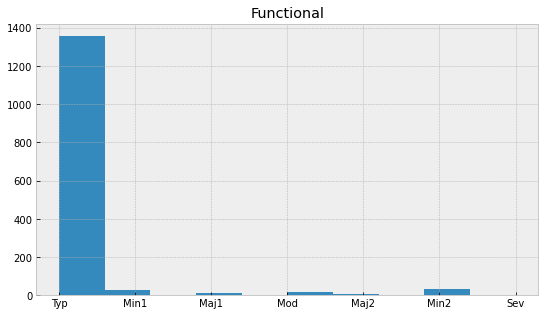

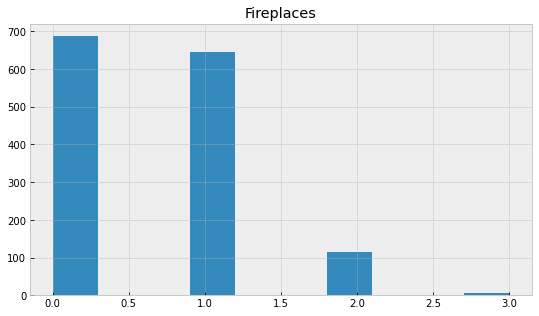

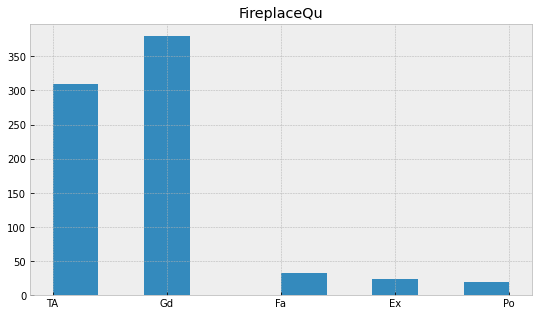

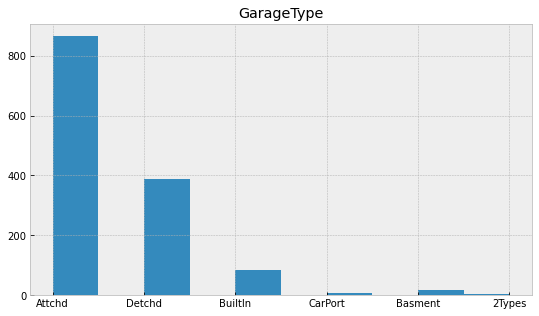

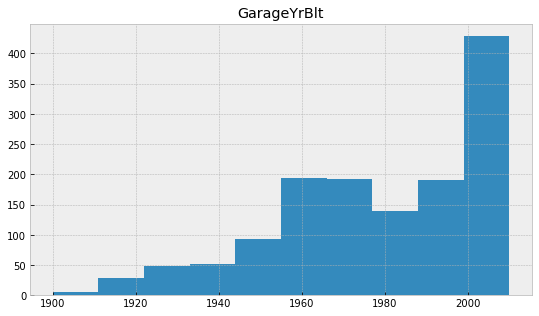

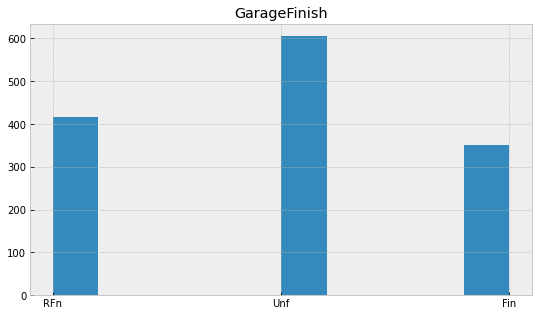

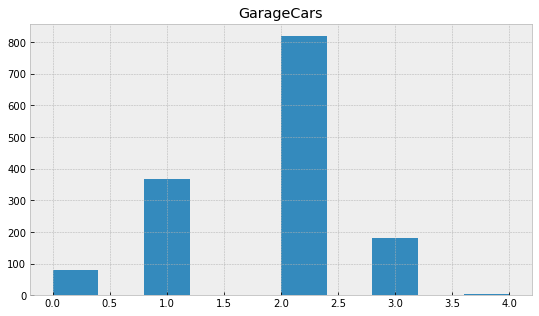

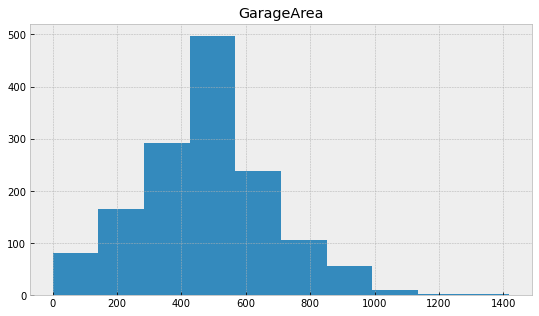

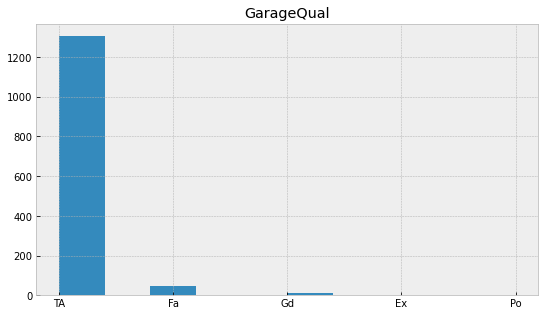

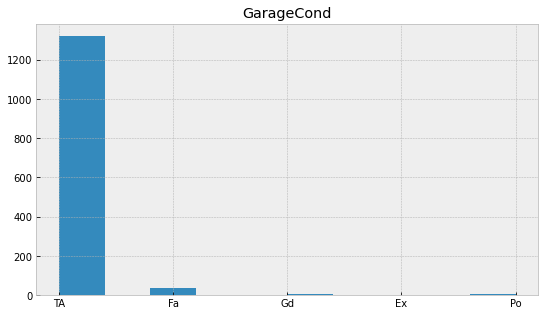

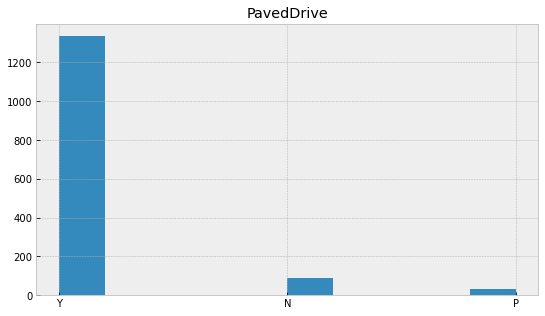

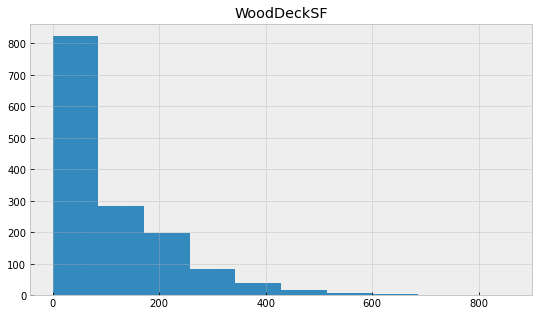

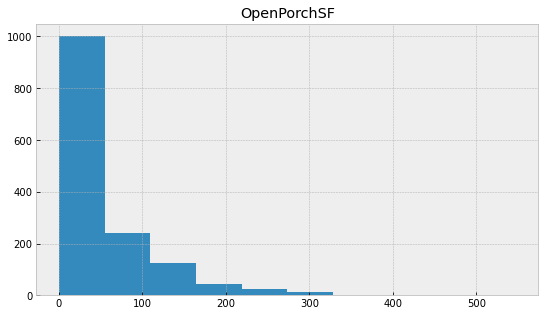

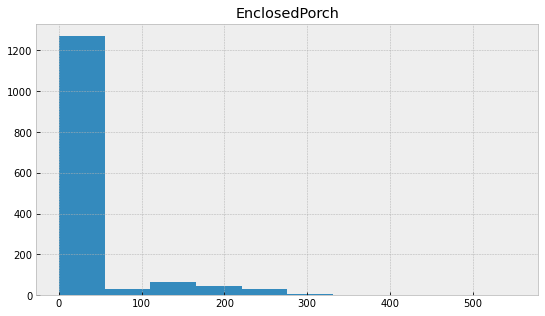

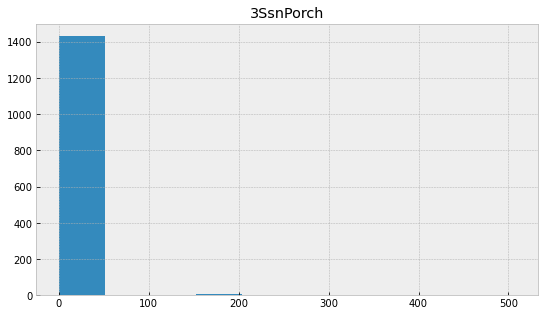

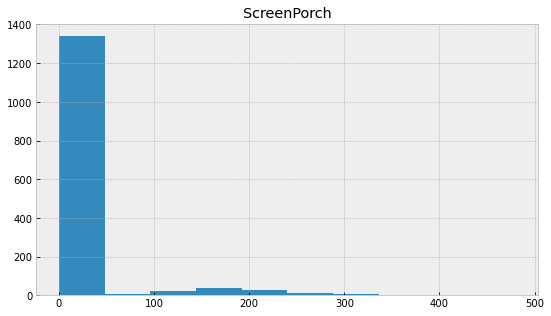

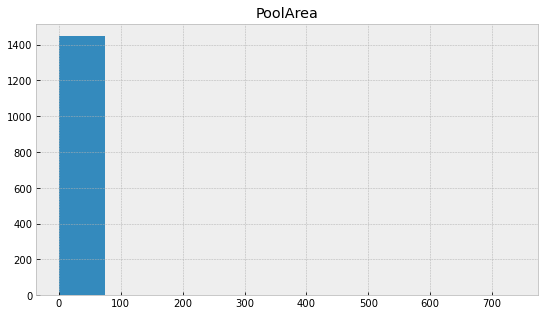

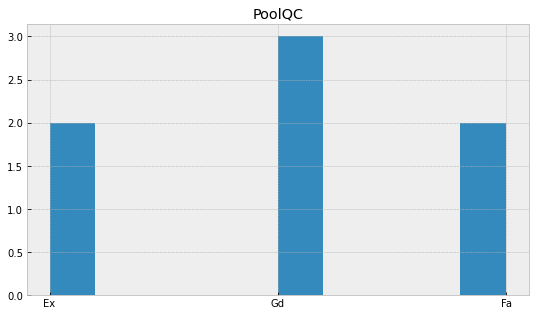

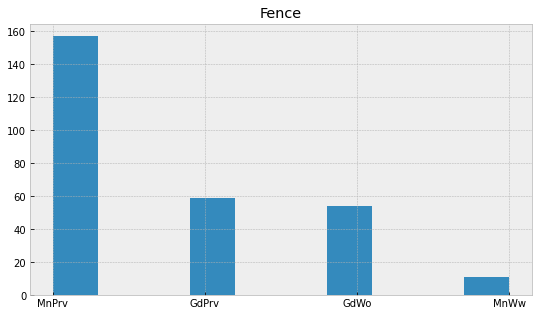

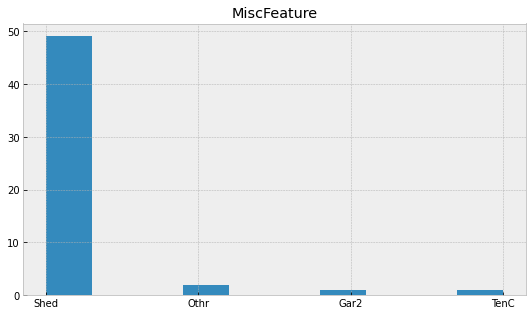

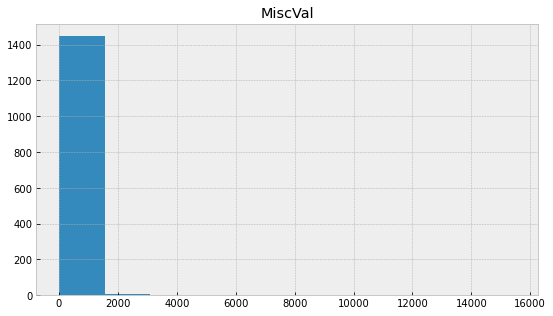

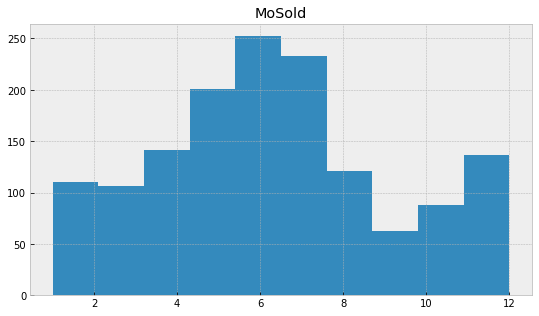

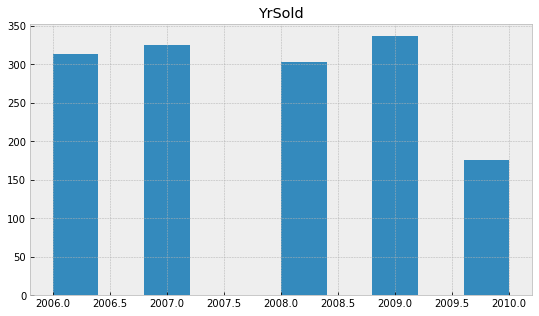

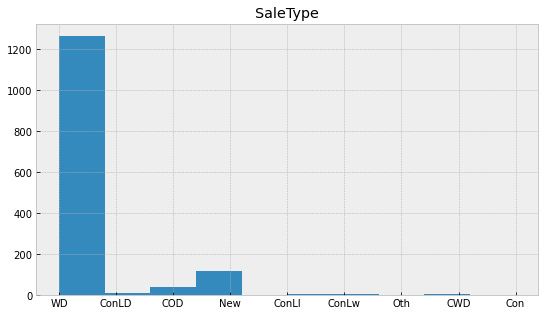

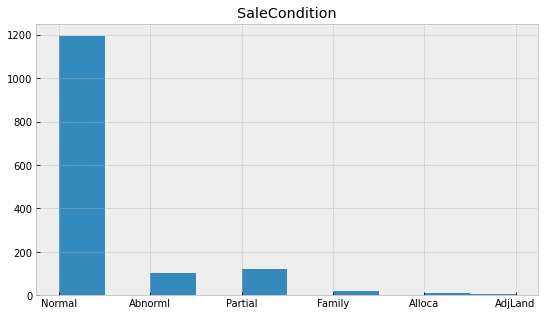

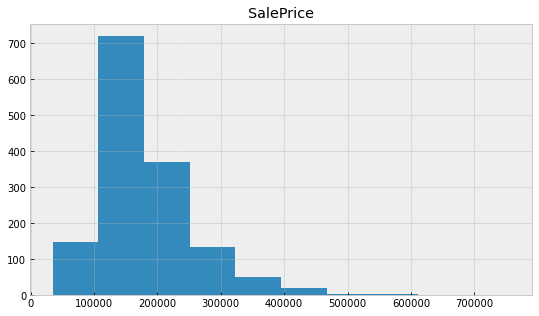

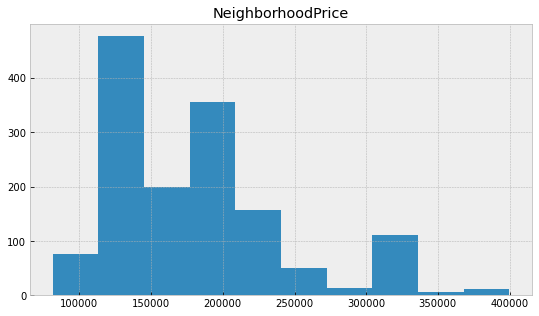

In [30]:
cols = list(df.columns)
for n in cols:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 5)
    ax1.set_title(n)
    ax1=df[n].hist()
plt.show()

In [35]:
# added this back here because somewhere along the way ddf became df.
ddf = pd.read_csv("./Data/clean_dummy.csv")
ddf.convert_dtypes()
ddf.columns

Index(['Id', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=268)

In [37]:
Missing(ddf)

LotFrontage               265
LotArea                     9
Street                      9
Alley                    1361
OverallQual                 9
                         ... 
SaleCondition_AdjLand       9
SaleCondition_Alloca        9
SaleCondition_Family        9
SaleCondition_Normal        9
SaleCondition_Partial       9
Length: 267, dtype: int64

In [38]:
ddf.dropna(subset=['SalePrice'], inplace=True)

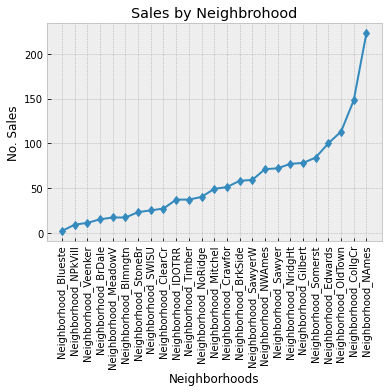

In [45]:
# lets take a look at how many homes were sold in each neighborhood
n=ddf.filter(like='Neighborhood').drop('NeighborhoodPrice',axis=1).sum()
n=n.sort_values()
#print(n)
fig= plt.plot(n, marker='d')
fig= plt.title("Sales by Neighbrohood")
fig= plt.ylabel ('No. Sales')
fig= plt.xlabel ('Neighborhoods')
fig= plt.xticks(rotation=90)
plt.show()

The most sales are in NAmes and the least are in Blueste.

In [46]:
fig.figure.savefig("./figures/Neighborhood_sales.png")

AttributeError: 'tuple' object has no attribute 'figure'

In [ ]:
q=df.copy()
q['SalesPerYear'] = pd.Series([1 for x in range(len(q.index))])
r=q[['Neighborhood','YrSold','SalesPerYear']].groupby(['YrSold','Neighborhood']).count()
#r

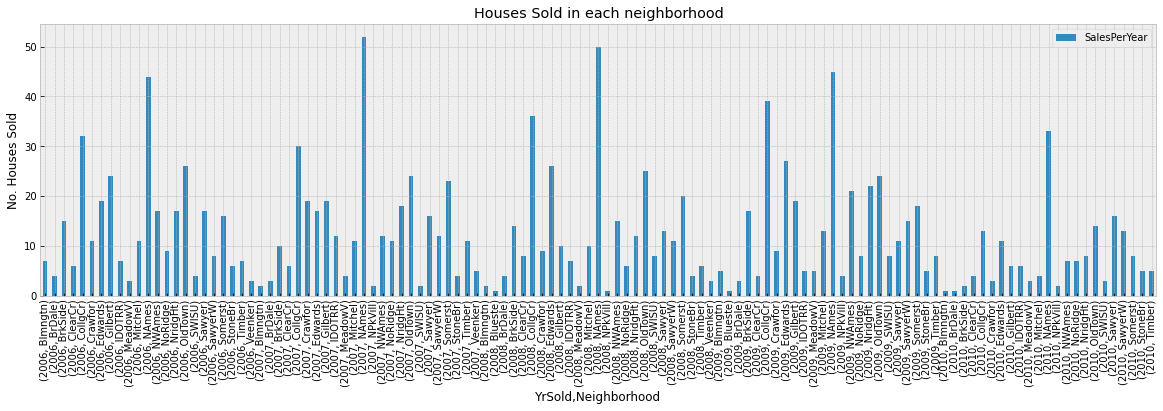

In [120]:
fig1=r.plot(figsize=(20,5), kind='bar')
fig1=plt.title('Houses Sold in each neighborhood')
fig1=plt.ylabel('No. Houses Sold')
fig1=plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='YrSold'>

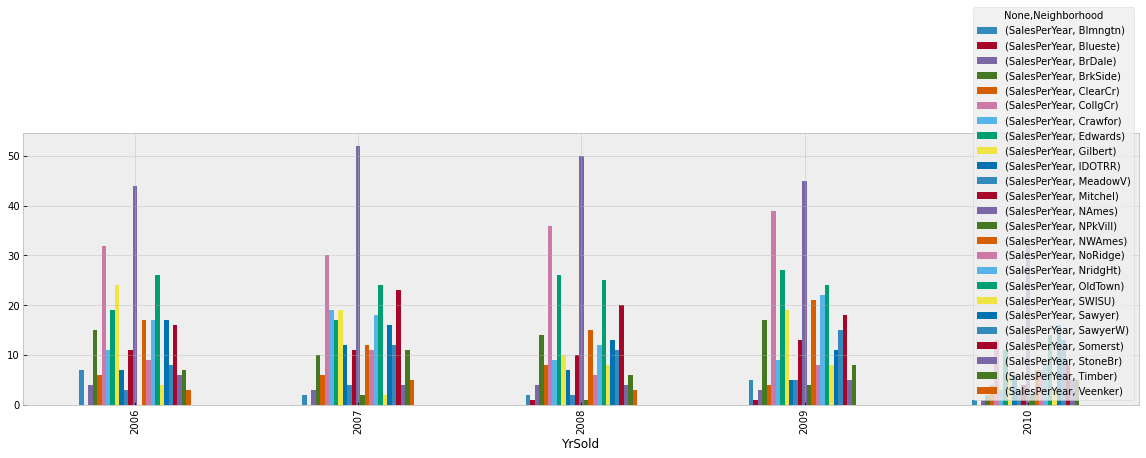

In [143]:
dfp=r.unstack()
dfp.fillna(0, inplace=True)
dfp.columns
dfp.plot(kind='bar', figsize=(20,5))
#sns.barplot(data=dfp,x='Neighborhood',y='SalesPerYear',hue='YrSold')

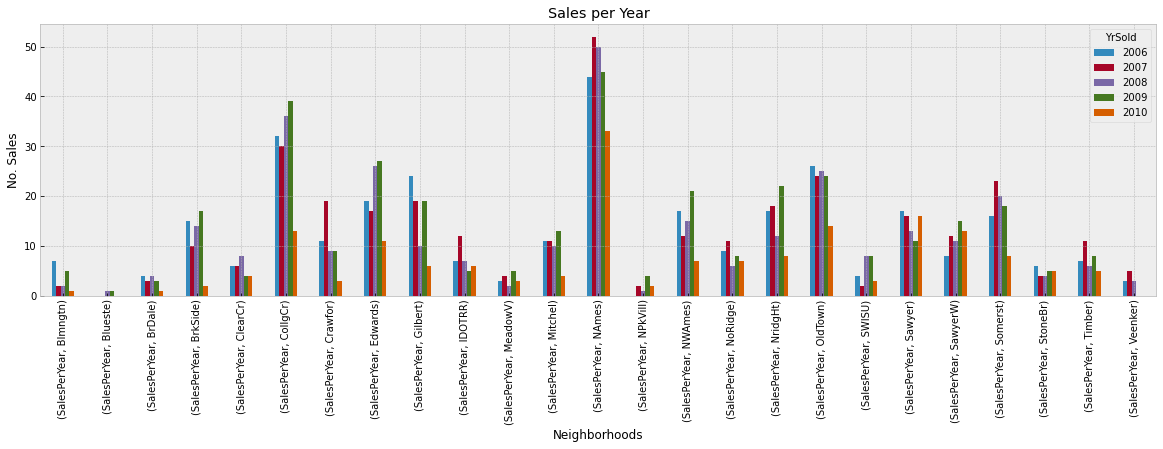

In [149]:
#Data needs to pivot to be readable
dfp.T.plot(kind='bar', figsize=(20,5))
plt.title('Sales per Year')
plt.ylabel('No. Sales')
plt.xlabel('Neighborhoods')
plt.show()

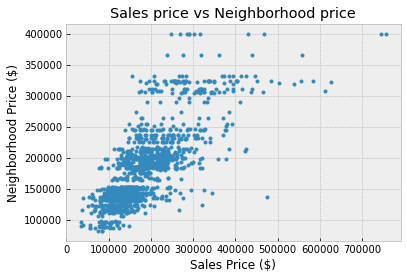

In [47]:
spr=list(df['SalePrice'])
npr=list(df['NeighborhoodPrice'])
fig = plt.plot(spr,npr, linestyle='none',marker='.')
fig = plt.xlabel('Sales Price ($)')
fig = plt.ylabel('Neighborhood Price ($)')
fig = plt.title('Sales price vs Neighborhood price')
plt.show()

In [56]:
#Let's look at the correlations between each variable.
pd.set_option('display.max_rows', None)
df.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id                 1.000000    0.008269    -0.009003 -0.033126    -0.027240   
MSSubClass         0.008269    1.000000    -0.384563 -0.139552     0.035562   
LotFrontage       -0.009003   -0.384563     1.000000  0.425414     0.251550   
LotArea           -0.033126   -0.139552     0.425414  1.000000     0.106247   
OverallQual       -0.027240    0.035562     0.251550  0.106247     1.000000   
OverallCond        0.013391   -0.059505    -0.058529 -0.005086    -0.093119   
YearBuilt         -0.015852    0.028631     0.123506  0.014416     0.572797   
YearRemodAdd      -0.023713    0.042317     0.088103  0.013879     0.550385   
MasVnrArea        -0.052000    0.021128     0.194597  0.104370     0.408750   
BsmtFinSF1        -0.004509   -0.070949     0.236575  0.214912     0.239501   
BsmtFinSF2        -0.005768   -0.066338     0.049706  0.110456    -0.058659   
BsmtUnfSF         -0.007990   -0.138132     0.130188 -0.003397     0.308035   
TotalBsmtSF       -0.014859   -0.237290     0.392758  0.260903     0.537641   
1stFlrSF           0.011536   -0.250310     0.457192  0.299417     0.475695   
2ndFlrSF           0.002108    0.306016     0.081037  0.050139     0.298964   
LowQualFinSF      -0.043834    0.046730     0.038403  0.004749    -0.030533   
GrLivArea          0.006175    0.074031     0.403010  0.262447     0.595420   
BsmtFullBath       0.006434    0.005304     0.100522  0.158703     0.109495   
BsmtHalfBath      -0.019142   -0.002124    -0.007491  0.048012    -0.040325   
FullBath           0.003698    0.133651     0.198099  0.125498     0.551023   
HalfBath           0.001712    0.173680     0.054809  0.013117     0.279903   
BedroomAbvGr       0.036397   -0.025906     0.263435  0.119117     0.103363   
KitchenAbvGr       0.000191    0.282200    -0.006313 -0.020594    -0.183019   
TotRmsAbvGrd       0.022645    0.037959     0.353102  0.189400     0.431172   
Fireplaces        -0.017961   -0.045004     0.266639  0.271067     0.396562   
GarageYrBlt       -0.002561    0.086635     0.069866 -0.024858     0.547927   
GarageCars         0.014226   -0.040576     0.286400  0.155291     0.601453   
GarageArea         0.015902   -0.098088     0.345412  0.180608     0.562411   
WoodDeckSF        -0.027984   -0.012314     0.087877  0.171274     0.239405   
OpenPorchSF        0.001137   -0.006094     0.152125  0.084838     0.309497   
EnclosedPorch      0.002569   -0.013053     0.010337 -0.019843    -0.113183   
3SsnPorch         -0.046264   -0.043860     0.070042  0.020402     0.030381   
ScreenPorch        0.002997   -0.026059     0.040379  0.043221     0.065164   
PoolArea           0.057534    0.008370     0.206460  0.077693     0.065257   
MiscVal           -0.021751   -0.018490     0.003233  0.031602    -0.024847   
MoSold             0.022699   -0.012153     0.010444  0.000801     0.070104   
YrSold            -0.000356   -0.023811     0.009408 -0.013604    -0.027163   
SalePrice         -0.022305   -0.082050     0.353168  0.264807     0.790942   
NeighborhoodPrice -0.012148   -0.010906     0.243273  0.163774     0.692708   

                   OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
Id                    0.013391  -0.015852     -0.023713   -0.052000   
MSSubClass           -0.059505   0.028631      0.042317    0.021128   
LotFrontage          -0.058529   0.123506      0.088103    0.194597   
LotArea              -0.005086   0.014416      0.013879    0.104370   
OverallQual          -0.093119   0.572797      0.550385    0.408750   
OverallCond           1.000000  -0.376837      0.073387   -0.125790   
YearBuilt            -0.376837   1.000000      0.591894    0.313234   
YearRemodAdd          0.073387   0.591894      1.000000    0.178277   
MasVnrArea           -0.125790   0.313234      0.178277    1.000000   
BsmtFinSF1           -0.046793   0.250641      0.129511    0.261108   
BsmtFinSF2            0.040454  -0.048565     -0.067435   -0.070870   
BsmtUnfSF   

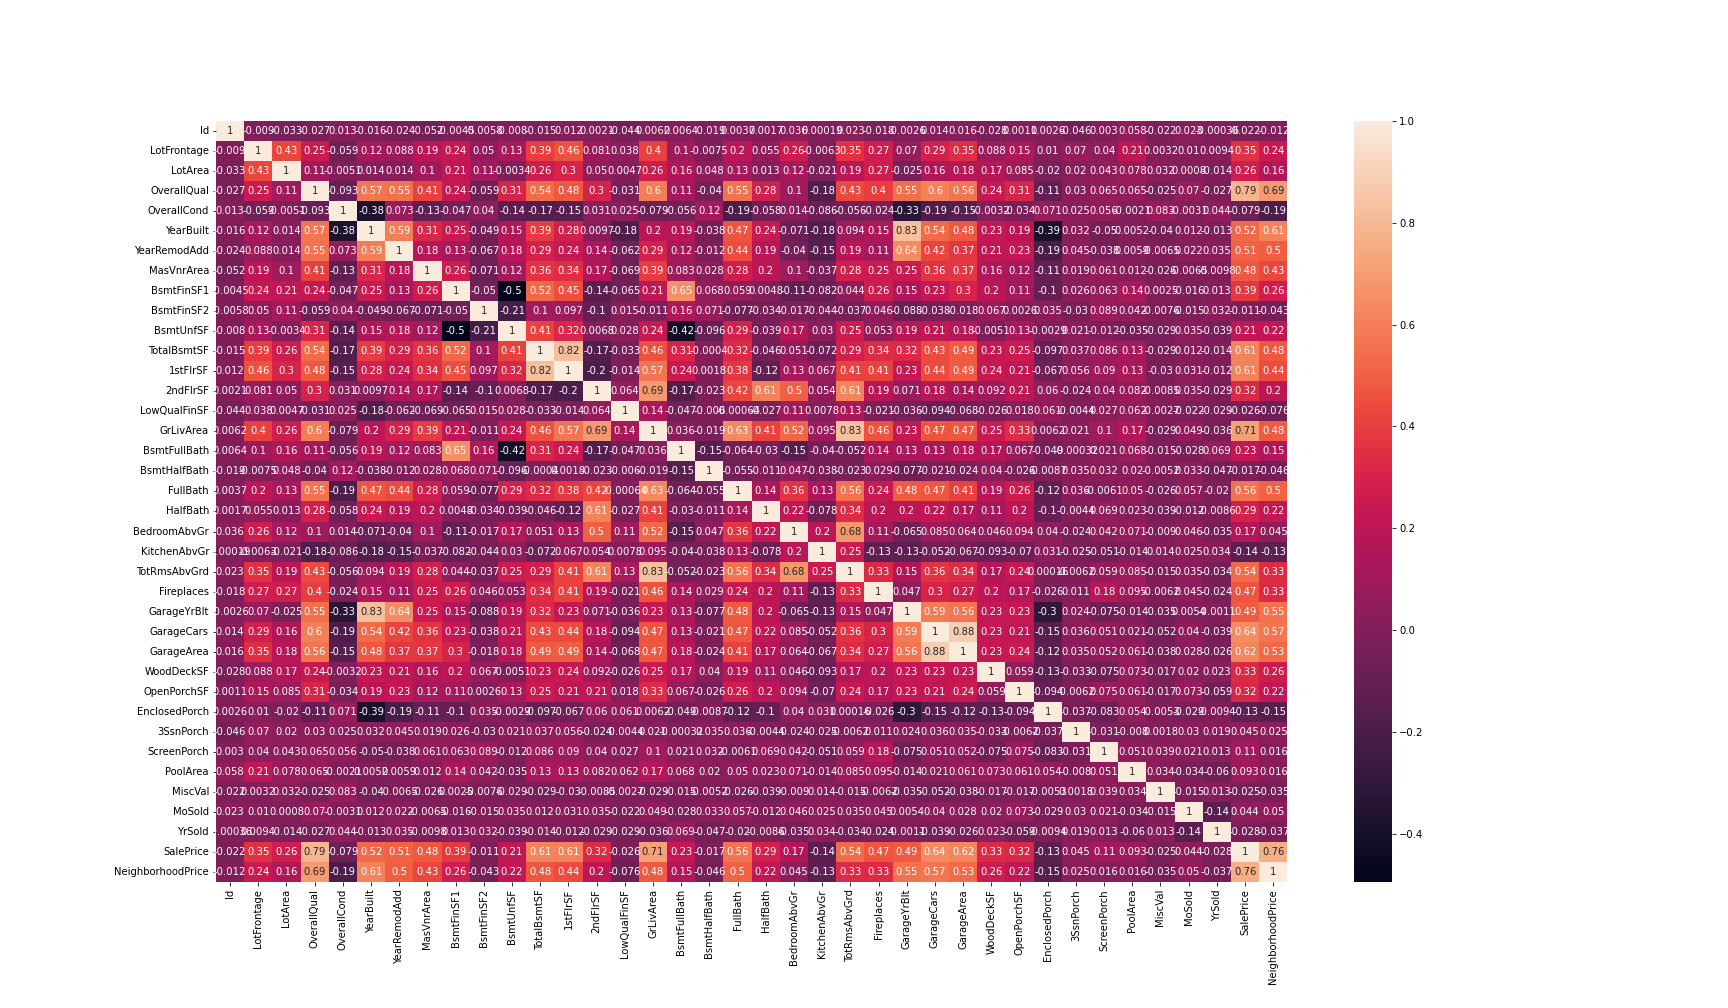

In [57]:
#Looks interesting.  WE can also make that a heatmap
# Note again I did this preprocessing because I didn't have the neighborhoods as dummy variables and 
# 80 variables is easier to look at than 256 
Image("./figures/heatmap.png")

SalePrice is most heavily influence positivly by **OverallQuality** *(0.79)*, **GLvArea** *(0.71)* and **NeighborhoodPrice** *(0.76)*

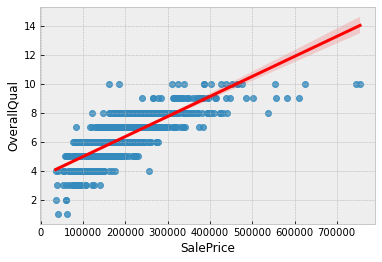

In [58]:
# For SalePrice, the top correlations appear to be OverallQual, GrLivArea, and NeighborhoodPrice
sns.regplot("SalePrice", "OverallQual", data=ddf, line_kws={"color": "red"});

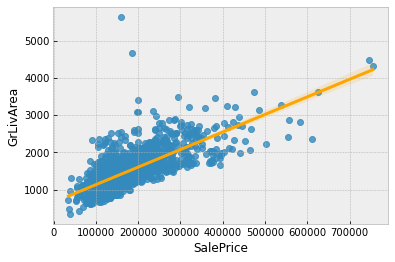

In [75]:
sns.regplot("SalePrice", "GrLivArea", data=ddf, line_kws={"color": "orange"});

In [50]:
# Had to convert both to float64 instead of Float64 because sns complained.
df['SalePrice']=df['SalePrice'].astype('float')
df['NeighborhoodPrice']=df['NeighborhoodPrice'].astype('float')
print(df['SalePrice'].dtype,df['NeighborhoodPrice'].dtype)

float64 float64


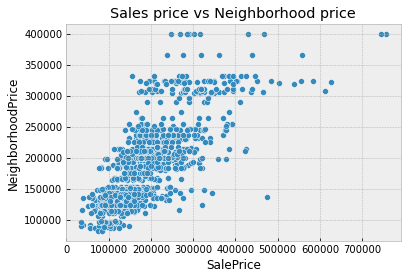

In [51]:
# The easier way to do this with seaborn.
fig=sns.scatterplot(x="SalePrice", y="NeighborhoodPrice", data=df);
fig = plt.title('Sales price vs Neighborhood price')
plt.show()

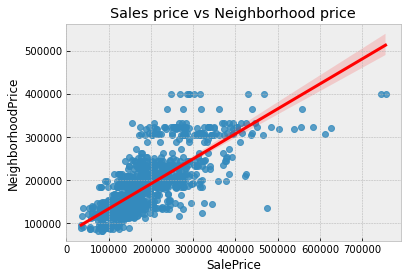

In [52]:
# And we can put in a linear regression to see trends
neighborhood_LR=sns.regplot("SalePrice", "NeighborhoodPrice", data=df, line_kws={"color": "red"});
neighborhood_LR = plt.title('Sales price vs Neighborhood price')
plt.show()

In [53]:
neighborhood_LR.figure.savefig("./figures/Neighborhood_LR.png")

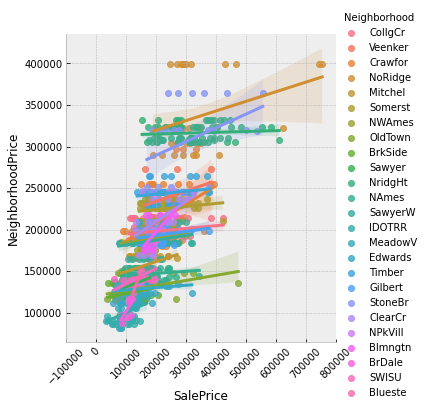

In [151]:
Plot_Neighberhood_Prices = sns.lmplot(x="SalePrice", y="NeighborhoodPrice", data=df, hue="Neighborhood")
loc, labels = plt.xticks()
Plot_Neighberhood_Prices.set_xticklabels(labels, rotation=45)

In [55]:
# Looks more complicated than just neighborhood price dictating sales price
# Some of the neighborhoods are completely flat!

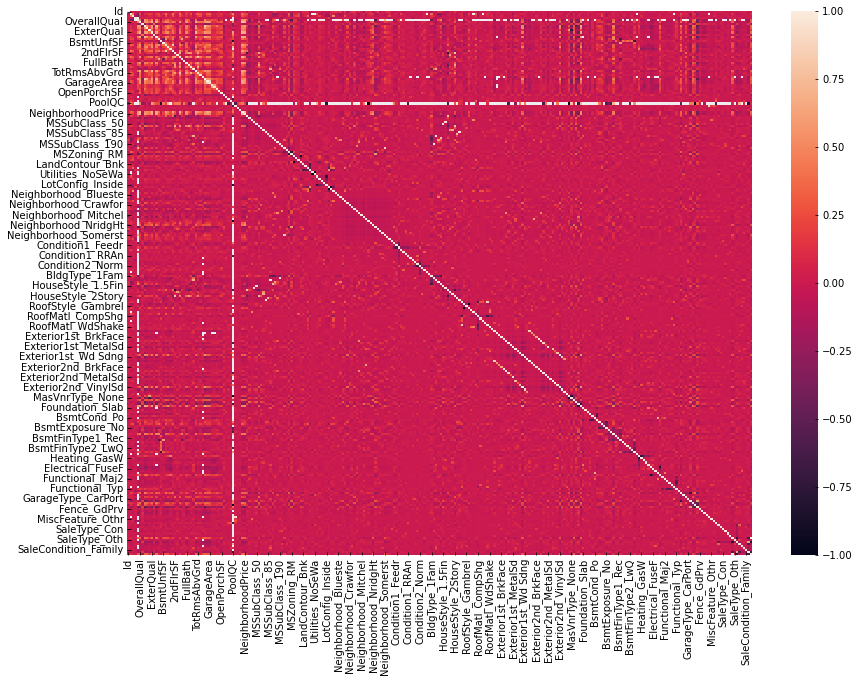

In [152]:
f, ax = plt.subplots(figsize=(14, 10))
ax = sns.heatmap(ddf.corr())

<font color='red'>**I can't even read this thing!**</font>

In [153]:
# I'm starting by dropping any NA values, but I've been thinking on filling the NA with the mean value instead
# Interpolating data inbetween each "neighborhood_price" by year for the years not present will be very helpful in their use
nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)
pd.set_option('display.max_rows', 10)
df2=df.drop(columns_with_nan, axis=1)
df2

['LotFrontage', 'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        3          60       RL    11250   Pave      IR1         Lvl   
2       23          20       RL     9742   Pave      Reg         Lvl   
3       33          20       RL    11049   Pave      Reg         Lvl   
4       44          20       RL     9200   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1447  1069         160       RM     3964   Pave      Reg         Lvl   
1448  1368         160       RM     2665   Pave      Reg         Lvl   
1449  1450         180       RM     1533   Pave      Reg         Lvl   
1450  1161         160       RL     2280   Pave      Reg         Lvl   
1451  1422         120       RL     4043   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... 3SsnPorch ScreenPorch PoolArea  \
0       AllPub    Inside       Gtl  ...         0           0        0   
1       AllPub    Inside       Gtl  ...         0           0        0   
2       AllPub    Inside       Gtl  ...         0           0        0   
3       AllPub    Corner       Gtl  ...         0           0        0   
4       AllPub   CulDSac       Gtl  ...         0           0        0   
...        ...       ...       ...  ...       ...         ...      ...   
1447    AllPub    Inside       Gtl  ...         0           0        0   
1448    AllPub    Inside       Gtl  ...         0           0        0   
1449    AllPub    Inside       Gtl  ...         0           0        0   
1450    AllPub    Inside       Gtl  ...         0           0        0   
1451    AllPub    Inside       Gtl  ...         0         165        0   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  \
0          0      2    2008        WD         Normal   208500.0   
1          0      9    2008        WD         Normal   223500.0   
2          0      9    2008        WD         Normal   230000.0   
3          0      1    2008        WD         Normal   179900.0   
4          0      7    2008        WD         Normal   130250.0   
...      ...    ...     ...       ...            ...        ...   
1447       0      6    2006        WD         Normal   151400.0   
1448       0      7    2006        WD         Normal   127000.0   
1449       0      8    2006        WD        Abnorml    92000.0   
1450       0      7    2010        WD         Normal   146000.0   
1451       0      7    2010        WD         Normal   127500.0   

     NeighborhoodPrice  
0        187718.055556  
1        187718.055556  
2        187718.055556  
3        187718.055556  
4        187718.055556  
...                ...  
1447     123466.666667  
1448     123466.666667  
1449     123466.666667  
1450     136750.000000  
1451     136750.000000  

[1452 rows x 66 columns]

In [154]:
# Dropping Columns with nan for the Dummy Variable list
nan_values = ddf.isna()
nan_columns = nan_values.any()
columns_with_nan = ddf.columns[nan_columns].tolist()
print('Columns with NaN',columns_with_nan)
pd.set_option('display.max_rows', 10)
ddf2=ddf.drop(columns_with_nan, axis=1)
print('Columns kept',ddf2.columns)

Columns with NaN ['LotFrontage', 'Alley', 'BsmtQual', 'FireplaceQu', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'PoolQC']
Columns kept Index(['Id', 'LotArea', 'Street', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=260)


In [155]:
# Dropping Columns with nan for the scaled dummy Variable list
nan_values = sf.isna()
nan_columns = nan_values.any()
columns_with_nan = sf.columns[nan_columns].tolist()
print('Columns with NaN',columns_with_nan)
# Making a new dataframe without the columns with NaN's
pd.set_option('display.max_rows', 10)
sf2=sf.drop(columns_with_nan, axis=1)
print('Columns Kept',sf2.columns)

Columns with NaN ['LotFrontage', 'Alley', 'BsmtQual', 'FireplaceQu', 'GarageYrBlt', 'GarageQual', 'GarageCond', 'PoolQC']
Columns Kept Index(['LotArea', 'Street', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=259)


### Using LabelEncoder on the non dummy variable dataset

In [156]:
# changes values into an ordinal numbering scheme (and is scaleable)
# This is good for rating, binary and pave categories
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3=df2.copy()
cat_columns = df2.select_dtypes(['string']).columns
for n in cat_columns:
    le.fit(df3[n])
    df3[n]=le.transform(df3[n])
# issue with this code is that the lables need to be in order, and my .unique() method of finding what the categories are doesn't always get them in order or have all the possible values.
# So I'm going to stick with my ratings code which isn't scalable for the moment

In [157]:
cat_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

# Some linerar regression modeling

In [158]:
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Scaled Dummy Variables

In [161]:
# at this point I really should have already split my data into train and test data.
# lets first try to figure out some PCA of the data to try to narrow down the number of categories we are using
X=sf2.drop('SalePrice', axis=1)
y=sf2['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) # random_state used for reproducibility
print(X_train.shape, X_test.shape)
print(y_train.shape,y_test.shape)

(1082, 258) (361, 258)
(1082,) (361,)


In [162]:
# Setup regressor
reg_all = LinearRegression()
# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: -1.5162587278433151e+26
Root Mean Squared Error: 12101358184143.19


In [163]:
sf_predict=reg_all.predict(X_test)
print("X_Test size is:",X_test.size,"\nY_pred size is:",sf_predict.size)

X_Test size is: 93138 
Y_pred size is: 361


UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

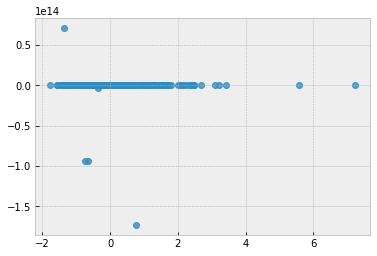

In [164]:
_=sns.regplot(y_test,sf_predict, line_kws={"color": "red"})
_=plt.xlabel('Test Data')
_=plt.ylabel('Predicted Values')
_=plt.title('Predicted Scatterplot')
plt.show();

### Dummy Variables not scaled

In [169]:
X2=ddf2.drop(['SalePrice'],axis=1)
y2=ddf2[['SalePrice']]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.25) # random_state used for reproducibility
print(X2_train.shape, X2_test.shape)
print(y2_train.shape,y2_test.shape)

(1082, 259) (361, 259)
(1082, 1) (361, 1)


In [170]:
# Setup regressor
reg_all2 = LinearRegression()
# Fit the regressor to the training data
reg_all2.fit(X2_train,y2_train)

# Predict on the test data: y_pred
y2_pred = reg_all2.predict(X2_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all2.score(X2_test, y2_test)))
rmse = np.sqrt(mean_squared_error(y2_test,y2_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7763571770226737
Root Mean Squared Error: 37011.0148884345


In [171]:
ddf_predict=reg_all2.predict(X2_test)
print("X2_Test size is:",X2_test.size,"\nY_pred size is:",ddf_predict.size)

X2_Test size is: 93499 
Y_pred size is: 361


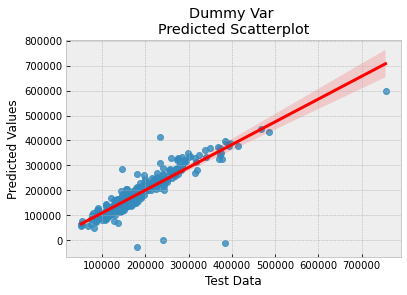

In [173]:
_=sns.regplot(y2_test,ddf_predict, line_kws={"color": "red"})
_=plt.xlabel('Test Data')
_=plt.ylabel('Predicted Values')
_=plt.title('Dummy Var \nPredicted Scatterplot')
plt.show();

In [174]:
_.figure.savefig("./figures/Dummy_LR.png")

### Clean categorical dataset with linear regression

In [177]:
X3=df3.drop('SalePrice',axis=1)
y3=df3[['SalePrice']]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.25) # random_state used for reproducibility
print(X3_train.shape, X3_test.shape)
print(y3_train.shape,y3_test.shape)

(1089, 65) (363, 65)
(1089, 1) (363, 1)


In [178]:
# Setup regressor
reg_all3 = LinearRegression()
# Fit the regressor to the training data
reg_all3.fit(X3_train,y3_train)

# Predict on the test data: y_pred
y3_pred = reg_all3.predict(X3_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all3.score(X3_test, y3_test)))
rmse = np.sqrt(mean_squared_error(y3_test,y3_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8706324317821146
Root Mean Squared Error: 26296.61378777558


In [179]:
df_predict=reg_all3.predict(X3_test)
print("X3_Test size is:",X3_test.size,"\nY_pred size is:",df_predict.size)

X3_Test size is: 23595 
Y_pred size is: 363


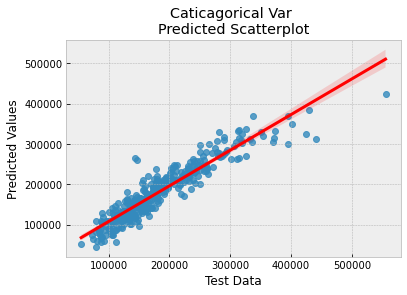

In [180]:
_=sns.regplot(y3_test,df_predict, line_kws={"color": "red"})
_=plt.xlabel('Test Data')
_=plt.ylabel('Predicted Values')
_=plt.title('Caticagorical Var \nPredicted Scatterplot')
plt.show();

87% is my best so far

In [181]:
_.figure.savefig("./figures/Cat_Linear_Regression.png")

### Lasso model to see what features have the greatest affect on price

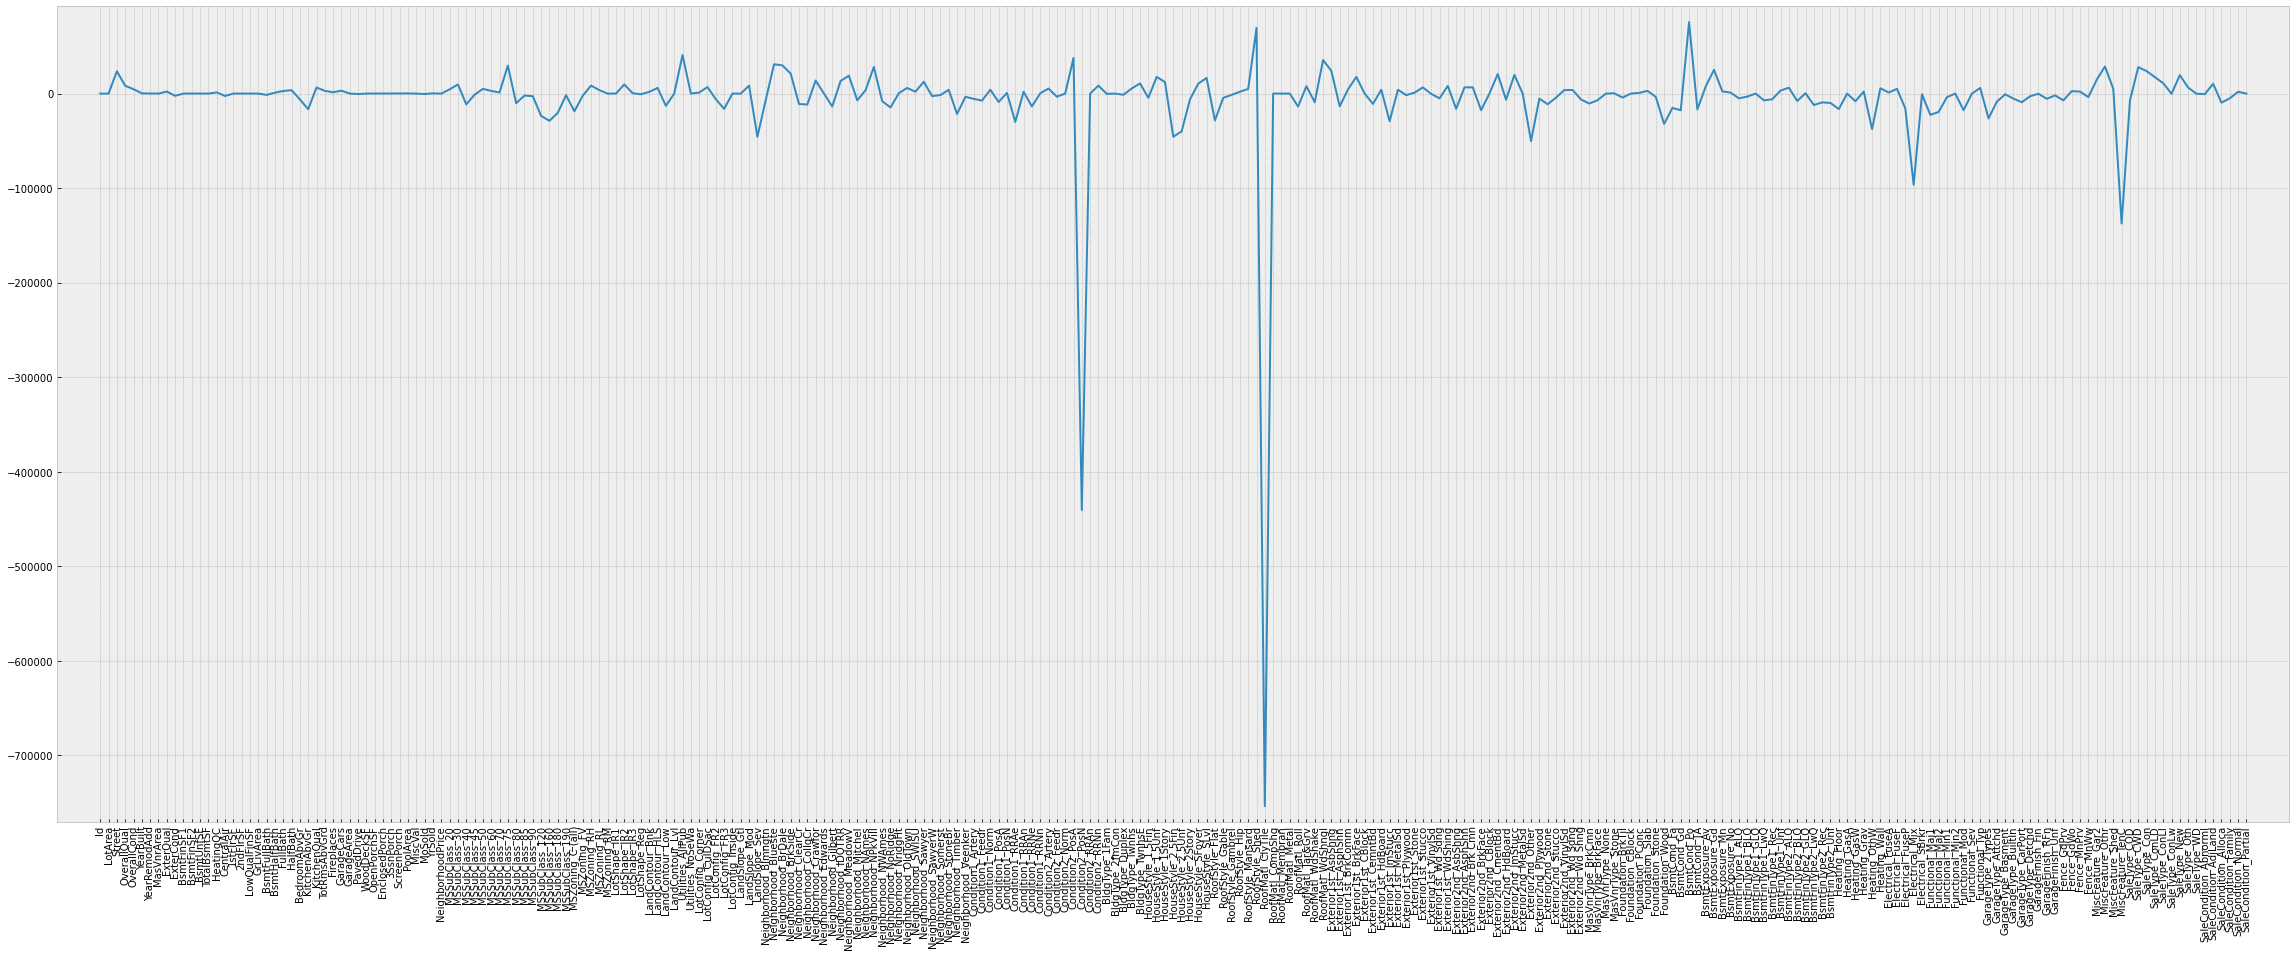

In [182]:
# can use lasso model to try to see which features have the greatest effect on the price
from sklearn.linear_model import Lasso
# Initiate lassor regressor and fit the regressor tothe data
lasso=Lasso(alpha=0.1, normalize=True)
lasso.fit(X2_train,y2_train)
# Compute and print the coefficients
lasso_coef=lasso.coef_
# Plot the coefficients
las, ax = plt.subplots(figsize = (40,15))
ax=plt.plot(range(len(X2.columns)), lasso_coef)
ax=plt.xticks(range(len(X2.columns)), X2.columns.values, rotation=90)
ax=plt.margins(0.02)
plt.show()

In [67]:
# this is interesting.  Being near a park or greenbelt as a second feature has a huge negative effect on the house price
# Street type roof type and being a new home are some of the biggest boosts to the sale value...

In [154]:
las.savefig("./figures/Lasso.png")

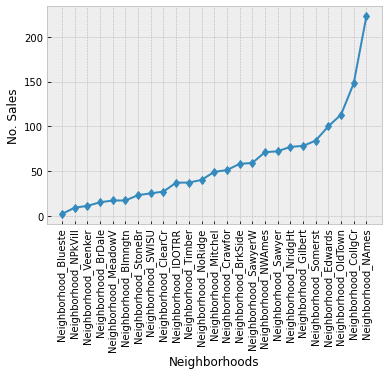

In [113]:
# lets take a look at how many homes were sold in each neighborhood
n=ddf.filter(like='Neighborhood').drop('NeighborhoodPrice',axis=1).sum()
n=n.sort_values()
_= plt.plot(n, marker='d')
_= plt.ylabel ('No. Sales')
_= plt.xlabel ('Neighborhoods')
_= plt.xticks(rotation=90)
plt.show()

This shows that North Ames and College Creek have the highest number of sales

In [ ]:
_.figure.savefig("./figures/Neighborhood_Sales.png")

# Data Analysis

### PCA Analysis

In [183]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [184]:
pca = PCA(n_components=10)

In [185]:
features=list(ddf2.drop('SalePrice',axis=1).columns)

In [186]:
pca_ddf=ddf2.fillna(0)

In [187]:
# Separating out the features
x = pca_ddf.loc[:, features].values
# Separating out the target
y = pca_ddf.loc[:,['SalePrice']].values
# Standardizing the features
x_std = StandardScaler().fit_transform(x)

In [188]:
pca.fit(x_std)

PCA(n_components=10)

In [189]:
print(pca.explained_variance_ratio_)

[0.06116081 0.03047409 0.02484293 0.020493   0.01825981 0.01674355
 0.01534433 0.01341646 0.01243537 0.0120793 ]


In [190]:
print(pca.score(x_std))

-348.7872578027541


In [191]:
print('first 10 components account for ',sum(pca.explained_variance_ratio_)*100,"% of the variability")

first 10 components account for  22.524965232228446 % of the variability


This means we can't simplify the data by PCA?

In [198]:
# what if we replace the NaN values with the mode?
pca = PCA(n_components=10)
features=list(df3.drop('SalePrice',axis=1).columns)

In [199]:
# Separating out the features
x = df3.loc[:, features].values
# Separating out the target
y = df3.loc[:,['SalePrice']].values
# Standardizing the features
x_std2 = StandardScaler().fit_transform(x)
print('Mean: ',x_std2.mean(),'\nSTD: ',x_std2.std())

Mean:  1.1665458455819827e-16 
STD:  1.0


In [201]:
pca.fit(x_std2)

PCA(n_components=10)

In [202]:
print(pca.explained_variance_ratio_)

[0.14060186 0.05408717 0.04892065 0.04065139 0.03404591 0.02966767
 0.02535493 0.02327484 0.02253568 0.02146974]


In [203]:
print(pca.score(x_std2))

-85.18166583307296


In [204]:
print('first 10 components account for ',sum(pca.explained_variance_ratio_)*100,"% of the variability")

first 10 components account for  44.0609821756164 % of the variability


Certainly we have better success in PCA analysis with the categorical variables

In [205]:
# one thing needed for proper PCA is converting the standard scalar to eigenvectors
cov_mat = np.cov(x_std2.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat) 
print('Eigenvectors \n%s' %eig_vecs) 
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 2.52659605e-03 -9.67178948e-03 -4.31453163e-03 ...  1.63390127e-01
   2.93930618e-16 -1.23593661e-16]
 [ 7.39448600e-03 -1.53482073e-01 -2.54499325e-01 ... -5.18585011e-03
  -2.57042380e-15 -2.58600457e-15]
 [ 8.70455093e-02 -3.26951370e-02  9.47137568e-02 ...  1.04439897e-02
   1.02809143e-16  2.67925632e-16]
 ...
 [ 2.18554904e-02 -2.11005014e-02 -2.08116350e-02 ...  2.13753183e-01
  -3.88973491e-16 -1.77014727e-16]
 [-7.83758366e-02  3.67118364e-02 -7.23450963e-02 ... -6.94946322e-02
   3.12006106e-17  2.44894513e-16]
 [-2.61451698e-01  4.99231903e-02 -4.29766946e-02 ... -4.35512364e-02
  -9.67094592e-16  6.26654642e-16]]

Eigenvalues 
[ 9.14541925e+00  3.51812784e+00  3.18211578e+00  2.64450521e+00
  2.21569361e+00  1.93227203e+00  1.65698297e+00  1.51972961e+00
  1.47216107e+00  1.42568766e+00  1.38825463e+00  8.89988989e-02
  1.02216015e-01  1.07340745e-01  1.29142141e-01  1.37619315e-01
  1.78704194e-01  1.25044786e+00  1.24400421e+00  2.16666156e-01
  1.2202740

In [206]:
print(np.mean(x),np.std(x))
print(x.shape)

3140.522483577017 23511.42586538561
(1452, 65)


In [207]:
#As we know that the sum of the square of each value in an Eigenvector is 1. So let’s see if it holds which mean we have computed Eigenvectors correctly.
sq_eig=[] 
for i in eig_vecs: 
    sq_eig.append(i**2) 
    
print(sum(sq_eig) )
for ev in eig_vecs: np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


AssertionError: 
Arrays are not almost equal to 6 decimals

Mismatched elements: 1 / 1 (100%)
Max absolute difference: 0.00429243
Max relative difference: 0.00431093
 x: array(1.)
 y: array(0.995708)

In [210]:
#Make a list of (eigenvalue, eigenvector) tuples 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))] 

print(type(eig_pairs)) 
    
#Sort the (eigenvalue, eigenvector) tuples from high to low eig_pairs.sort() 
eig_pairs.sort() 
#print("\n",eig_pairs) 

#Visually confirm that the list is correctly sorted by decreasing eigenvalues 
print('\nEigenvalues in descending order:') 
for i in eig_pairs: 
    print(i[0])

<class 'list'>

Eigenvalues in descending order:
1.5049063367961999e-18
1.4917364120661643e-15
0.08899889889536108
0.10221601466636927
0.10734074510881328
0.12914214098367383
0.137619315131139
0.17870419385095762
0.21666615604250758
0.23402525589034862
0.2620444853275848
0.28710225666507383
0.33120493789371336
0.33941198681147977
0.38330892447081033
0.40419645878563704
0.41544077879550995
0.44260325636369174
0.4897941784080599
0.5040291343991641
0.5416728163721761
0.5679920811953305
0.5771123070070531
0.5836665556962893
0.6151664191129766
0.6171269845814901
0.6339379115973139
0.6609038402732335
0.7010130521806421
0.740450130518841
0.7414840305629079
0.7552156524550614
0.778633641433507
0.8041781979436278
0.8054194941937066
0.8439024758561369
0.8657954741297761
0.8790465193016036
0.9075715165255249
0.9155901249789448
0.9441303012444745
0.9761541699537941
0.991275838294673
1.0232263256741059
1.032782840856069
1.0716313411850886
1.0749709532150562
1.0986840960282216
1.1122347327427693
1.1

In [211]:
# 22 variables eigenvalues are above 1... Does this mean 22 of the features are contributing to most of the varience?
pca = PCA(n_components=22)
pca.fit(x_std2)
print('first 22 components account for ',sum(pca.explained_variance_ratio_)*100,"% of the variability")

first 22 components account for  65.23204125075497 % of the variability


**That certainly made an imporvement.**

### Can I project this onto a 2D graph?

<font color='blue'> I never actually got this part to work </font>

In [ ]:
pd.set_option('display.max_rows', 10)
feat_cols = ['feature'+str(i) for i in range(x_std2.shape[1])]
normalised_data = pd.DataFrame(x_std2,columns=feat_cols)
normalised_data

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pca_df[['SalePrice']]], axis = 1)

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [features]
colors = ['jet']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['SalePrice'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Linear regression Analysis

In [212]:
from sklearn.linear_model import LinearRegression

In [213]:
regr = LinearRegression()
  
regr.fit(X2_train, y2_train)
print(regr.score(X2_test, y2_test))

0.7763571770226737


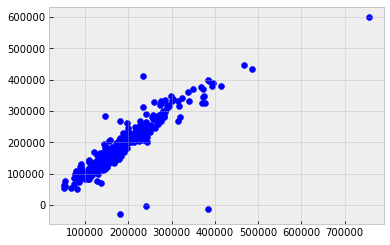

In [214]:
y2_pred = regr.predict(X2_test)
plt.scatter(y2_test, y2_pred, color ='b')
  
plt.show()

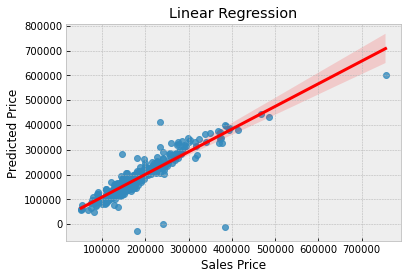

In [215]:
lr_plot=sns.regplot(y2_test,y2_pred,line_kws={"color": "red"})
lr_plot=plt.title('Linear Regression')
lr_plot=plt.xlabel('Sales Price')
lr_plot=plt.ylabel('Predicted Price')
plt.show()

One data point is really off here, but the rest hold up.

**Now lets try this on the standardized data***

In [216]:
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

-1.5162587278433151e+26


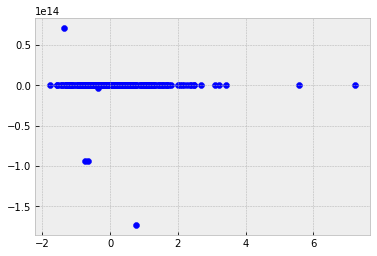

In [217]:
y2_pred = regr.predict(X_test)
plt.scatter(y_test, y2_pred, color ='b')
  
plt.show()

<font color='red'> Nope! that didn't work</font>

In [218]:
# With the non dummy variables
regr = LinearRegression()
  
regr.fit(X3_train, y3_train)
print(regr.score(X3_test, y3_test))

0.8706324317821146


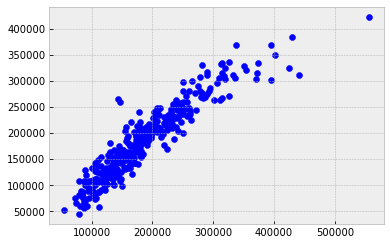

In [219]:
y3_pred = regr.predict(X3_test)
plt.scatter(y3_test, y3_pred, color ='b')
  
plt.show()

Finally got this to work okay.  I used label endocer to fill in the variables.

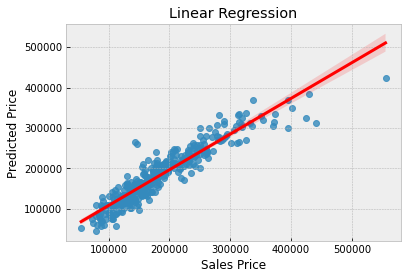

In [220]:
lr_plot=sns.regplot(y3_test,y3_pred,line_kws={"color": "red"})
lr_plot=plt.title('Linear Regression')
lr_plot=plt.xlabel('Sales Price')
lr_plot=plt.ylabel('Predicted Price')
plt.show()

# KMeansClustering Test

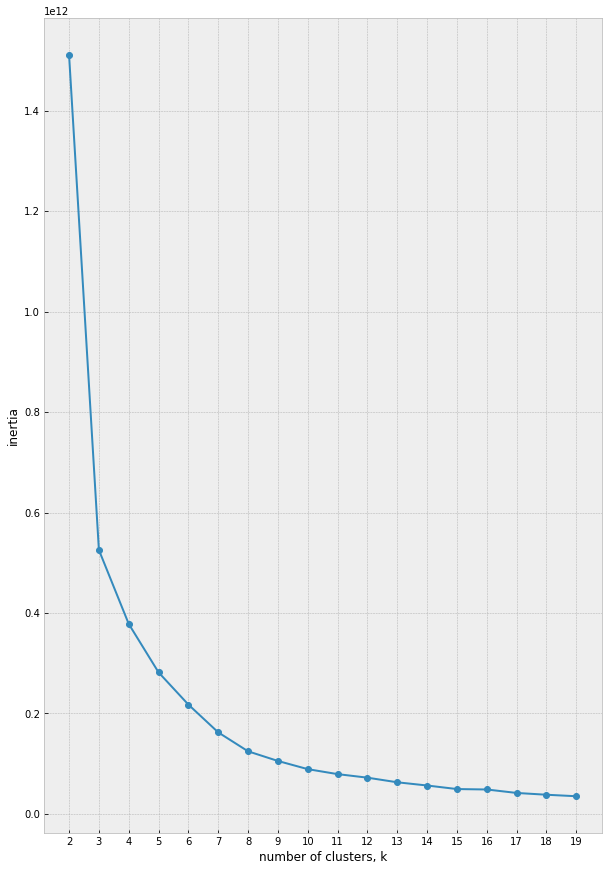

In [221]:
# Import KMeans to start, I'll try KNN afterwards
from sklearn.cluster import KMeans

ks = range(2, 20)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model =KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X2_train)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(10,15))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

**The "elbow" is between 8 and 9**

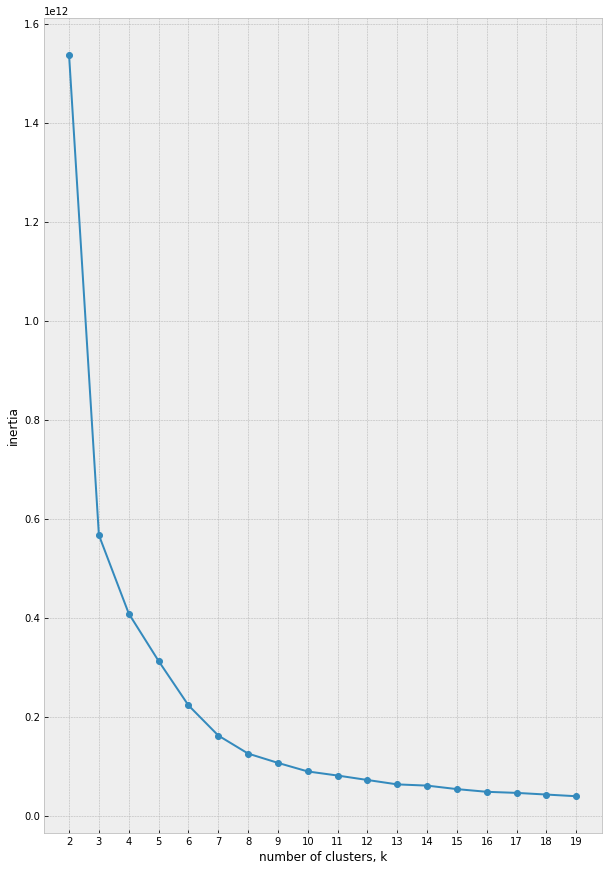

In [222]:
# Import KMeans to start, I'll try KNN afterwards
from sklearn.cluster import KMeans

ks = range(2, 20)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model =KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X3_train)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(10,15))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## Grid Search (on KNN Regressor)

In [249]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


**Scaled Dummy Variable Data**

In [268]:
test_scores = []
train_scores = []
rmse_val =[]
for i in range(1,12):

    knn = KNeighborsRegressor(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train)) # Score on Trained data
    test_scores.append(knn.score(X_test,y_test)) # Score on Test data
    pred=knn.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values

In [269]:
cf=pd.DataFrame([train_scores,test_scores, rmse_val]).transpose()
cf.rename(columns={0:'Train Score',1:'Test Score',2:'RMSE'}, inplace=True)
cf

Train Score  Test Score      RMSE
0      1.000000    0.494666  0.698613
1      0.900314    0.588215  0.630642
2      0.846981    0.630622  0.597287
3      0.822655    0.650377  0.581095
4      0.806809    0.671373  0.563377
..          ...         ...       ...
6      0.787539    0.696006  0.541851
7      0.780212    0.701446  0.536981
8      0.776138    0.695793  0.542041
9      0.777197    0.692589  0.544888
10     0.771184    0.695180  0.542587

[11 rows x 3 columns]

In [270]:
print('Best Test score: ',cf['Test Score'].max(),'\nBest RMSE: ',cf['RMSE'].max())

Best Test score:  0.7014460275213434 
Best RMSE:  0.698613131403975


In [243]:
knn=KNeighborsRegressor(7)
knn.fit(X_train,y_train)
A=knn.kneighbors_graph(X_train, 2, mode='connectivity')#, include_self=True)
A.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [244]:
A.shape

(1082, 1082)

<AxesSubplot:>

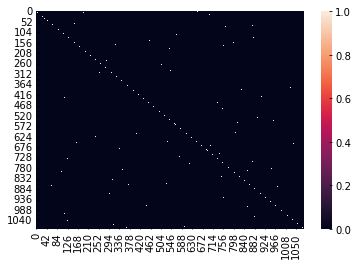

In [245]:
sns.heatmap(A.toarray())

**Unscaled dummy variable data**

In [264]:
test_scores = []
train_scores = []
rmse_val =[]
for i in range(1,12):

    knn = KNeighborsRegressor(i)
    knn.fit(X2_train,y2_train)
    
    train_scores.append(knn.score(X2_train,y2_train)) # Score on Trained data
    test_scores.append(knn.score(X2_test,y2_test)) # Score on Test data
    pred=knn.predict(X2_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y2_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values

In [265]:
cf=pd.DataFrame([train_scores,test_scores, rmse_val]).transpose()
cf.rename(columns={0:'Train Score',1:'Test Score',2:'RMSE'}, inplace=True)
cf

Train Score  Test Score          RMSE
0      1.000000    0.573605  51104.548903
1      0.869593    0.626009  47861.274469
2      0.817101    0.657428  45806.752949
3      0.791652    0.674645  44640.801974
4      0.766865    0.688653  43669.286882
..          ...         ...           ...
6      0.733989    0.667321  45140.494271
7      0.726249    0.665841  45240.802451
8      0.715201    0.665089  45291.670027
9      0.713133    0.670975  44891.865402
10     0.704748    0.668169  45082.904920

[11 rows x 3 columns]

In [266]:
print('Best Test score: ',cf['Test Score'].max(),'\nBest RMSE: ',cf['RMSE'].max())

Best Test score:  0.6886526474315363 
Best RMSE:  51104.54890329645


This okay but not as good as the Linear regression

In [256]:
#scale data
from sklearn import preprocessing
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler()
scaler.fit(X2_train)
X_train_scaler=scaler.transform(X2_train)
X_test_scaler=scaler.transform(X2_test)

In [261]:
test_scores = []
train_scores = []
rmse_val =[]
for i in range(1,12):

    knn = KNeighborsRegressor(i)
    knn.fit(X_train_scaler,y2_train)
    
    train_scores.append(knn.score(X_train_scaler,y2_train)) # Score on Trained data
    test_scores.append(knn.score(X_test_scaler,y2_test)) # Score on Test data
    pred=knn.predict(X_test_scaler) #make prediction on test set
    error = np.sqrt(mean_squared_error(y2_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values

In [262]:
cf=pd.DataFrame([train_scores,test_scores, rmse_val]).transpose()
cf.rename(columns={0:'Train Score',1:'Test Score',2:'RMSE'}, inplace=True)
cf

Train Score  Test Score          RMSE
0      1.000000    0.621917  48122.351450
1      0.892886    0.728784  40757.826995
2      0.835458    0.731395  40561.199143
3      0.806654    0.733352  40413.132390
4      0.797449    0.735218  40271.475913
..          ...         ...           ...
6      0.779787    0.726958  40894.821302
7      0.770404    0.725399  41011.425123
8      0.764599    0.732821  40453.349134
9      0.761047    0.725964  40969.201063
10     0.757792    0.719789  41428.186423

[11 rows x 3 columns]

In [263]:
print('Best Test score: ',cf['Test Score'].max(),'\nBest RMSE: ',cf['RMSE'].max())

Best Test score:  0.735218236654836 
Best RMSE:  48122.3514502328


In [ ]:
cf['Test Score'].plot()

<font color = 'red'> Marginal Improvement </font>

**Categorical Data**

In [272]:
test_scores = []
train_scores = []
rmse_val =[]
for i in range(1,12):

    knn = KNeighborsRegressor(i)
    knn.fit(X3_train,y3_train)
    
    train_scores.append(knn.score(X3_train,y3_train)) # Score on Trained data
    test_scores.append(knn.score(X3_test,y3_test)) # Score on Test data
    pred=knn.predict(X3_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y3_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    
cf=pd.DataFrame([train_scores,test_scores, rmse_val]).transpose()
cf.rename(columns={0:'Train Score',1:'Test Score',2:'RMSE'}, inplace=True)
cf

Train Score  Test Score          RMSE
0      1.000000    0.582461  47242.805669
1      0.861072    0.682996  41164.152041
2      0.811832    0.689779  40721.432213
3      0.776587    0.695325  40355.758311
4      0.762637    0.699837  40055.826078
..          ...         ...           ...
6      0.730924    0.712725  39186.428665
7      0.719945    0.701104  39971.173174
8      0.701554    0.705894  39649.629052
9      0.694317    0.708038  39504.862680
10     0.686244    0.707588  39535.259390

[11 rows x 3 columns]

In [273]:
print('Best Test score: ',cf['Test Score'].max(),'\nBest RMSE: ',cf['RMSE'].max())

Best Test score:  0.7198948244532583 
Best RMSE:  47242.805669442


Interesting that this wasn't better in accuracy but RMSE was better...

#### Now we will try a grid search

In [274]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsRegressor()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X2_train,y2_train)
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.6345271294763339
Best Parameters: {'n_neighbors': 10}


In [281]:
knn_cv.best_params_.get('n_neighbors')

10

In [282]:
knn = KNeighborsRegressor(knn_cv.best_params_.get('n_neighbors'))
knn.fit(X2_train,y2_train)
knn.score(X2_train,y2_train)

0.7131325936178323

In [283]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsRegressor()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X3_train,y3_train)
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.6246747568200266
Best Parameters: {'n_neighbors': 6}


In [284]:
knn = KNeighborsRegressor(knn_cv.best_params_.get('n_neighbors'))
knn.fit(X3_train,y3_train)
knn.score(X3_train,y3_train)

0.7416258455347744

KNN seems like a bust as well

# Random Forest Regressor w/ Hypertuning

In [285]:
from sklearn.metrics import f1_score
#from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score # Useful for Random Forest Classifier but not so much for Regressor
from sklearn.metrics import accuracy_score,log_loss
from sklearn.ensemble import RandomForestRegressor

Score:  0.9818755659421748


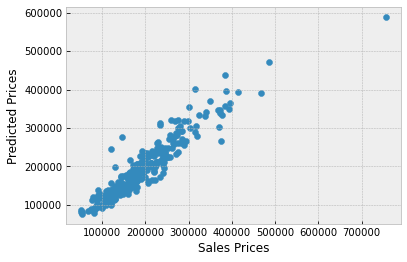

In [286]:
clf = RandomForestRegressor(n_estimators=300, n_jobs=-1)
model_res = clf.fit(X2_train, y2_train)
y_pred = model_res.predict(X2_test)
score = model_res.score(X2_train,y2_train)
plt.scatter(y2_test,y_pred)
plt.xlabel('Sales Prices')
plt.ylabel('Predicted Prices')
print('Score: ',score)

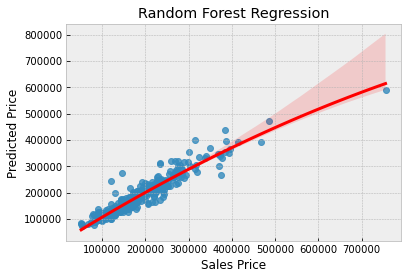

In [288]:
rf_plot=sns.regplot(y2_test,y_pred,line_kws={"color": "red"}, order=2)
rf_plot=plt.title('Random Forest Regression')
rf_plot=plt.xlabel('Sales Price')
rf_plot=plt.ylabel('Predicted Price')
plt.show()

In [289]:
rf_plot.figure.savefig(./figures/Ranforest.png)

In [290]:
param_grid = {'max_depth':np.arange(1,12)}
clf = RandomForestRegressor(n_estimators=300, n_jobs=-1)
clf_cv= GridSearchCV(clf,param_grid,cv=5)
clf_cv.fit(X2_train,y2_train)
print("Best Score:" + str(clf_cv.best_score_))
print("Best Parameters: " + str(clf_cv.best_params_))

Best Score:0.8524218655401198
Best Parameters: {'max_depth': 10}


**I wonder why this is worse?**

Score:  0.9823808733436237


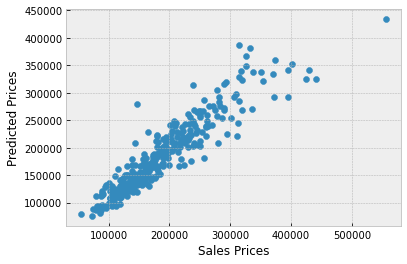

In [291]:
clf = RandomForestRegressor(n_estimators=300, n_jobs=-1)
model_res = clf.fit(X3_train, y3_train)
y_pred = model_res.predict(X3_test)
score = model_res.score(X3_train,y3_train)
plt.scatter(y3_test,y_pred)
plt.xlabel('Sales Prices')
plt.ylabel('Predicted Prices')
print('Score: ',score)

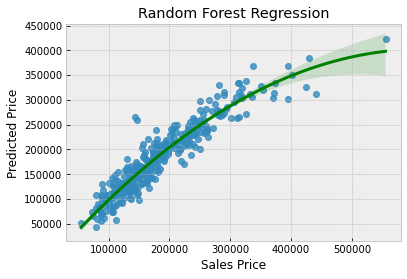

In [292]:
rf_plot=sns.regplot(y3_test,y3_pred,line_kws={"color": "green"}, order=2)
rf_plot=plt.title('Random Forest Regression')
rf_plot=plt.xlabel('Sales Price')
rf_plot=plt.ylabel('Predicted Price')
plt.show()

In [293]:
rf_plot.figure.savefig("./figures/Ranforest2.png")

**Same predictive precent but the graphs are different.  I'm actually partial to the second even though it has a wider confidence at the end.**

In [327]:
df2.dtypes

Id                     Int64
MSSubClass             Int64
MSZoning              string
LotArea                Int64
Street                string
                      ...   
YrSold                 Int64
SaleType              string
SaleCondition         string
SalePrice            float64
NeighborhoodPrice    float64
Length: 66, dtype: object

# Gradient Boost Regressor Test

In [294]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [295]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingRegressor(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X2_train, y2_train)
    ypred = gb.predict(X2_test)
    mse = mean_squared_error(y2_test,ypred)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X2_train, y2_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X2_test, y2_test)))
    print("MSE: %.2f" % mse)
    print()

Learning rate:  0.05
Accuracy score (training): 0.189
Accuracy score (validation): 0.182
MSE: 5011380061.03

Learning rate:  0.1
Accuracy score (training): 0.328
Accuracy score (validation): 0.315
MSE: 4198577629.05

Learning rate:  0.25
Accuracy score (training): 0.564
Accuracy score (validation): 0.515
MSE: 2970516104.78

Learning rate:  0.5
Accuracy score (training): 0.709
Accuracy score (validation): 0.621
MSE: 2318819760.09

Learning rate:  0.75
Accuracy score (training): 0.701
Accuracy score (validation): 0.597
MSE: 2466819668.48

Learning rate:  1
Accuracy score (training): 0.649
Accuracy score (validation): 0.544
MSE: 2795630759.57



In [296]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingRegressor(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X3_train, y3_train)
    ypred = gb.predict(X3_test)
    mse = mean_squared_error(y3_test,ypred)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X3_train, y3_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X3_test, y3_test)))
    print("MSE: %.2f" % mse)
    print()

Learning rate:  0.05
Accuracy score (training): 0.425
Accuracy score (validation): 0.413
MSE: 3135679397.32

Learning rate:  0.1
Accuracy score (training): 0.623
Accuracy score (validation): 0.600
MSE: 2136928773.85

Learning rate:  0.25
Accuracy score (training): 0.799
Accuracy score (validation): 0.744
MSE: 1370393194.27

Learning rate:  0.5
Accuracy score (training): 0.845
Accuracy score (validation): 0.717
MSE: 1513880308.89

Learning rate:  0.75
Accuracy score (training): 0.823
Accuracy score (validation): 0.665
MSE: 1789724441.60

Learning rate:  1
Accuracy score (training): 0.817
Accuracy score (validation): 0.570
MSE: 2297928416.43



<font color='red'> **Better...But not as good as Random Forest** </font>

# Bayesian Optomization

In [297]:
import lightgbm as lgb
from bayes_opt import BayesianOptimization
from catboost import CatBoostClassifier, cv, Pool

In [298]:
# For this optomization I'm going to try to have the machine learning algorythims make the classifiers for me.
tc = pd.read_csv("./Data/clean.csv",index_col='Unnamed: 0')
tc.dropna(subset=['SalePrice'],inplace=True) # drop those 8 na's in the data that I don't know where they came from.
# I saved the columns which were categorical here
cc=pd.read_csv("./Data/cat_columns.csv",index_col='Unnamed: 0')
# get the features list
features3=list(tc.drop(['Id','SalePrice'],axis=1).columns)
# Separating out the features
#X3 = tc.loc[:, features3].values
# Separating out the target
#y3 = tc.loc[:,['SalePrice']].values
# Train test split 25%
#X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.25) 
# Pull out the categorical columns from the data
cat_features= cc['0']

In [299]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(X3_train, y3_train, categorical_feature=cat_features)
lgb_eval = lgb.Dataset(X3_test, y3_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=5)])

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
y_pred = gbm.predict(X3_test, num_iteration=gbm.best_iteration)
# eval
rmse_test = mean_squared_error(y3_test, y_pred) ** 0.5
print(f'The RMSE of prediction is: {rmse_test}')

Starting training...


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [300]:
def lgb_eval(num_leaves,max_depth,lambda_l2,lambda_l1,min_child_samples, min_data_in_leaf):
    params = {
        "objective" : "regression",
        "metric" : "l2", 
        'is_unbalance': True,
        "num_leaves" : int(num_leaves),
        "max_depth" : int(max_depth),
        "lambda_l2" : lambda_l2,
        "lambda_l1" : lambda_l1,
        "num_threads" : 20,
        "min_child_samples" : int(min_child_samples),
        'min_data_in_leaf': int(min_data_in_leaf),
        "learning_rate" : 0.03,
        "subsample_freq" : 5,
        "bagging_seed" : 42,
        "verbosity" : -1
    }
    lgtrain = lgb.Dataset(X3_train, y3_train, categorical_feature=cat_features)
    cv_result = lgb.cv(params,
                       lgtrain,
                       1000,
                       early_stopping_rounds=100,
                       stratified=True,
                       nfold=3)
    return cv_result['Mean Square Error'][-1]

In [301]:
X3_train.shape

(1089, 65)

In [302]:
lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (25, 4000),
                                                'max_depth': (5, 63),
                                                'lambda_l2': (0.0, 0.05),
                                                'lambda_l1': (0.0, 0.05),
                                                'min_child_samples': (50, 10000),
                                                'min_data_in_leaf': (100, 2000)
                                                })

lgbBO.maximize(n_iter=10, init_points=2)

|   iter    |  target   | lambda_l1 | lambda_l2 | max_depth | min_ch... | min_da... | num_le... |
-------------------------------------------------------------------------------------------------


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [303]:
import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
#import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

In [305]:
# I'm separating out the values this time because I can't run a DaraFrame through CatBoostRegressor
features3=list(df3.drop(['Id','SalePrice'],axis=1).columns)
# Separating out the features
X4 = df3.loc[:, features3].values
# Separating out the target
y4 = df3.loc[:,['SalePrice']].values
# Train test split 25%
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.25) 

In [314]:
features3

['MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'NeighborhoodPrice']

In [308]:
# Setting up CatBoostRegressor to test
train_dataset = cb.Pool(X4_train, y4_train) 
test_dataset = cb.Pool(X4_test, y4_test)
model = cb.CatBoostRegressor(loss_function='RMSE',logging_level='Silent') # Set logging level to silent b/c too much output on my screen!

In [309]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset, verbose=False)

{'params': {'depth': 6,
  'l2_leaf_reg': 3,
  'iterations': 200,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,

In [310]:
pred = model.predict(X4_test)
rmse = (np.sqrt(mean_squared_error(y4_test, pred)))
r2 = r2_score(y4_test, pred)
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 31165.99
R2: 0.87


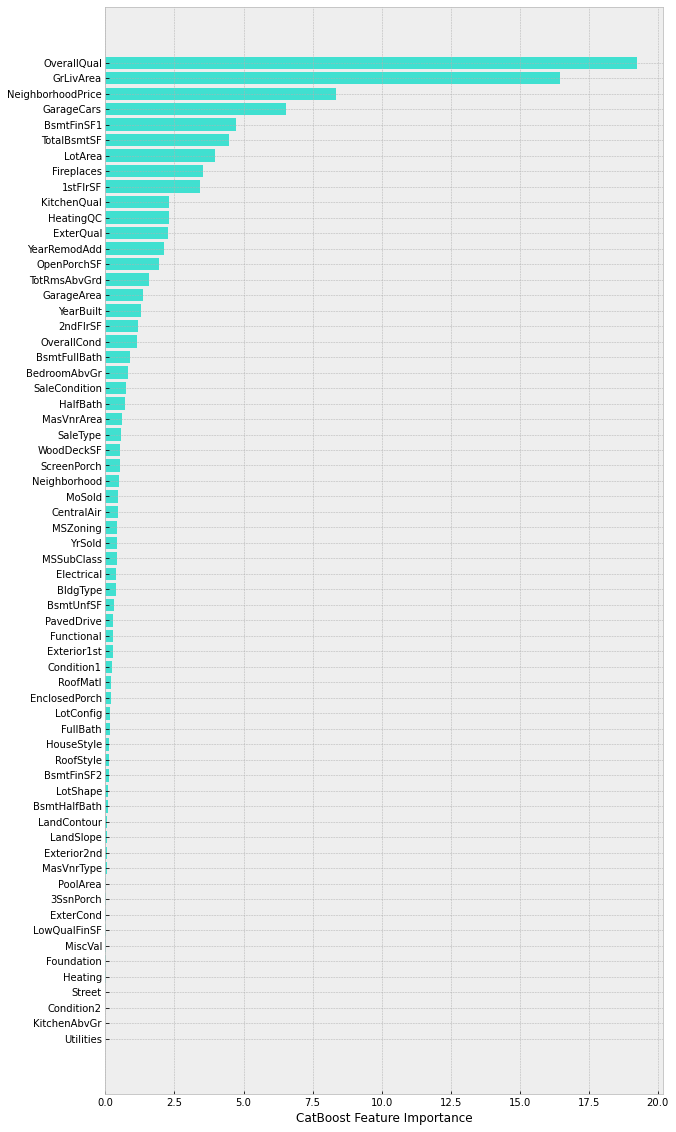

In [317]:
sorted_feature_importance = model.feature_importances_.argsort()
Cat_Importance=plt.figure(figsize=(10,20))
Cat_Importance=plt.barh(np.array(features3)[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
Cat_Importance=plt.xlabel("CatBoost Feature Importance")

In [318]:
Cat_Importance.figure.savefig("./figures/Category_Importance2.png")

In [319]:
# Setting up CatBoostRegressor to test This time I'll use the same X_train and y_train values and not split them again
train_dataset = cb.Pool(X3_train.values, y3_train.values) 
test_dataset = cb.Pool(X3_test.values, y3_test.values)
model = cb.CatBoostRegressor(loss_function='RMSE',logging_level='Silent')

In [320]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset,verbose=False)

{'params': {'depth': 4,
  'l2_leaf_reg': 1,
  'iterations': 200,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,

In [321]:
pred = model.predict(X3_test.values)
rmse = (np.sqrt(mean_squared_error(y3_test.values, pred)))
r2 = r2_score(y3_test.values, pred)
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 21075.02
R2: 0.92


**92% ain't half bad.  Still we have the best with Random Forest**

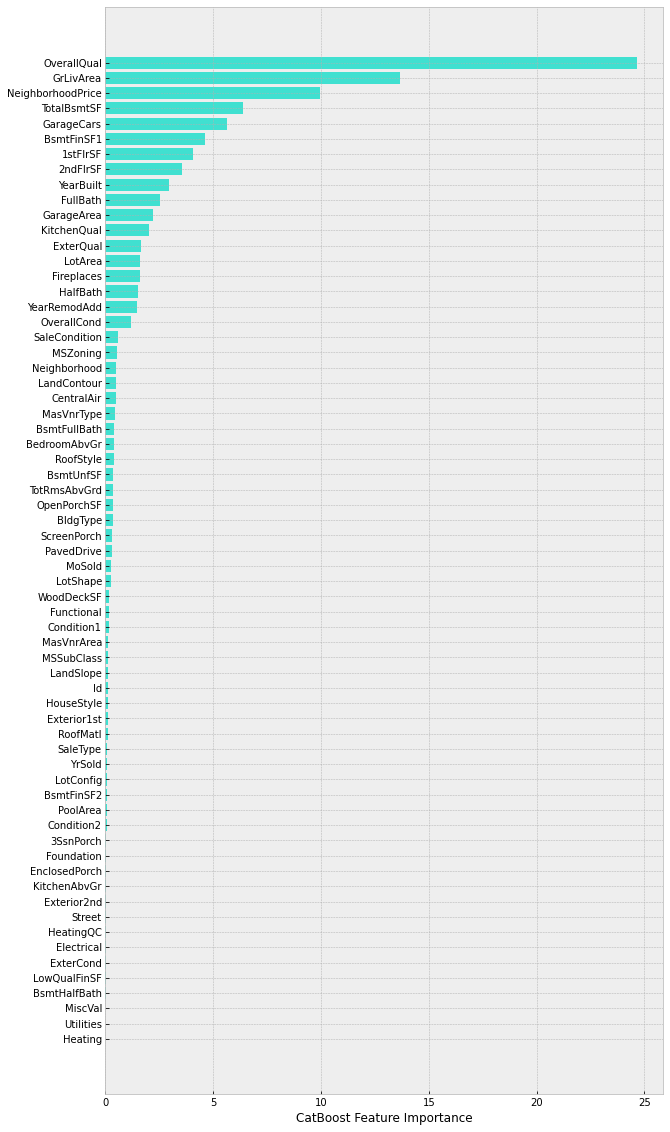

In [322]:
sorted_feature_importance = model.feature_importances_.argsort()
Cat_Importance=plt.figure(figsize=(10,20))
Cat_Importance=plt.barh(X3_train.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
Cat_Importance=plt.xlabel("CatBoost Feature Importance")

What if I did a random search instead of a grid search?

In [324]:
train_dataset = cb.Pool(X3_train.values, y3_train.values) 
test_dataset = cb.Pool(X3_test.values, y3_test.values)
model = cb.CatBoostRegressor(loss_function='RMSE',logging_level='Silent')
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.randomized_search(grid, train_dataset,verbose=False)

{'params': {'depth': 4,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

**That was certainly faster!**

In [325]:
pred = model.predict(X3_test.values)
rmse = (np.sqrt(mean_squared_error(y3_test.values, pred)))
r2 = r2_score(y3_test.values, pred)
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 21317.12
R2: 0.91


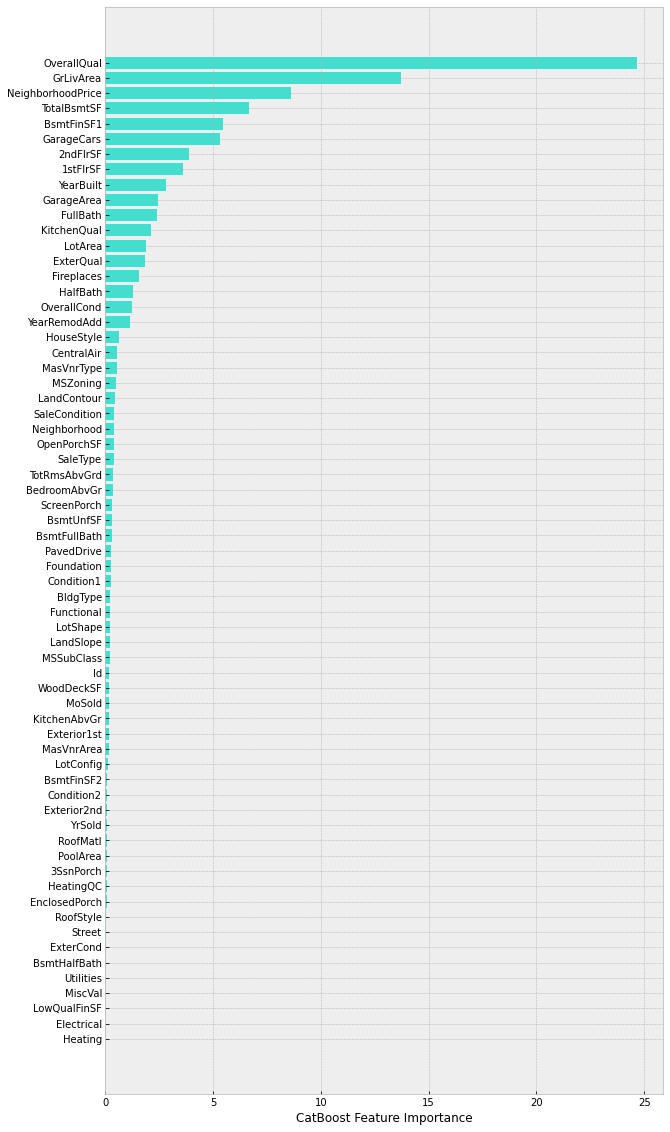

In [326]:
sorted_feature_importance = model.feature_importances_.argsort()
Cat_Importance=plt.figure(figsize=(10,20))
Cat_Importance=plt.barh(X3_train.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
Cat_Importance=plt.xlabel("CatBoost Feature Importance")

Similar results though

In [ ]:
df3.to_csv("./Data/clean_cat.csv", index=False)